In [1]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.4 MB/s eta 0:00:00


In [2]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 985.9 kB/s eta 0:00:00


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from nltk.tokenize import regexp_tokenize
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from collections import defaultdict
import re, nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.patches as mpatches
import random
from sklearn import metrics
import re
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import GRU
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.tree import DecisionTreeClassifier
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag, corpus
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import keras_tuner as kt
import warnings
from sklearn.metrics import precision_recall_curve
from nltk.tokenize import sent_tokenize, word_tokenize
from tensorflow.keras.models import load_model
import pickle
import os
import pickle
import numpy as np
from tensorflow.keras.models import load_model

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_p

True

In [5]:
#UMICH SI650 - Sentiment Classification
#https://www.kaggle.com/competitions/si650winter11/data

In [6]:
! pip install -q kaggle
! mkdir ~/.kaggle

In [7]:
#Choose the kaggle.json file that you downloaded
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle competitions download -c si650winter11
! unzip si650winter11.zip -d si650winter11

  0% 0.00/506k [00:00<?, ?B/s]
100% 506k/506k [00:00<00:00, 110MB/s]
Archive:  si650winter11.zip
  inflating: si650winter11/testdata.txt  
  inflating: si650winter11/training.txt  


In [9]:
#Read test and train datasets
# header=0 -> first line contains column names
# delimiter=\t -> fields are separated by tabs
# quoting=3 -> ignore double quotes

train_data_df  = pd.read_table('si650winter11/training.txt', names=['sentiment', 'comment'], header=None, delimiter="\t", quoting=3)
test_data_df  = pd.read_table('si650winter11/testdata.txt', names=['comment'], header=None, delimiter="\t", quoting=3)

In [ ]:
test_data_df.head(5)

comment
0  " I don't care what anyone says, I like Hillar...
1                  have an awesome time at purdue!..
2  Yep, I'm still in London, which is pretty awes...
3  Have to say, I hate Paris Hilton's behavior bu...
4                            i will love the lakers.

In [19]:
train_data_df

sentiment                                            comment
0             1            The Da Vinci Code book is just awesome.
1             1  this was the first clive cussler i've ever rea...
2             1                   i liked the Da Vinci Code a lot.
3             1                   i liked the Da Vinci Code a lot.
4             1  I liked the Da Vinci Code but it ultimatly did...
...         ...                                                ...
7081          0                     Brokeback Mountain was boring.
7082          0       So Brokeback Mountain was really depressing.
7083          0  As I sit here, watching the MTV Movie Awards, ...
7084          0    Ok brokeback mountain is such a horrible movie.
7085          0   Oh, and Brokeback Mountain was a terrible movie.

[7086 rows x 2 columns]

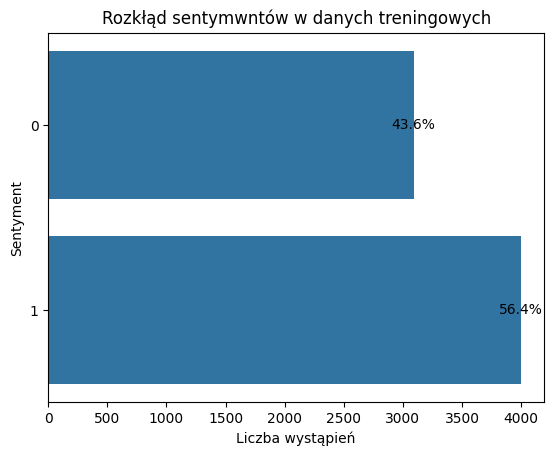

In [ ]:
ax = sns.countplot(y="sentiment", data=train_data_df)
ax.set(title="Rozkłąd sentymwntów w danych treningowych", xlabel="Liczba wystąpień", ylabel="Sentyment")
total_freq = len(train_data_df)
for p in ax.patches:
    percentage = f'{100 * p.get_width() / total_freq:.1f}%'
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

In [ ]:
#number words per sentence
np.mean([len(s.split(" ")) for s in train_data_df.comment])

10.886819079875812

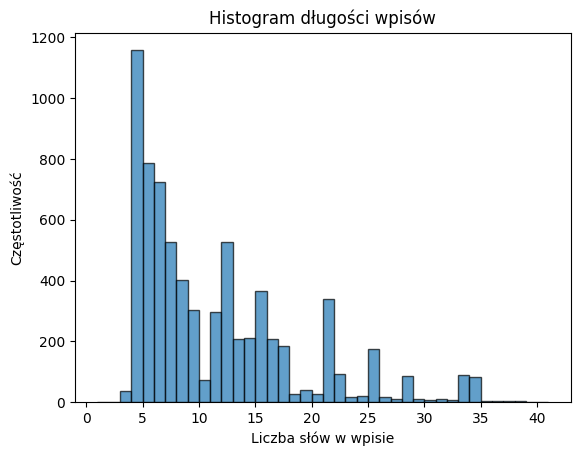

In [ ]:
#Make a frequency list of lengths of tokenized each sentences
list_freq = [len(regexp_tokenize(s, "\w+")) for s in train_data_df["comment"]]

# Plot a histogram of the line lengths
#plt.figure(figsize=(8, 6))  # Ustawienie rozmiaru figury
plt.hist(list_freq, bins=range(1, max(list_freq) + 2), edgecolor='black', alpha=0.7)
plt.title("Histogram długości wpisów")
plt.xlabel("Liczba słów w wpisie")
plt.ylabel("Częstotliwość")
plt.show()

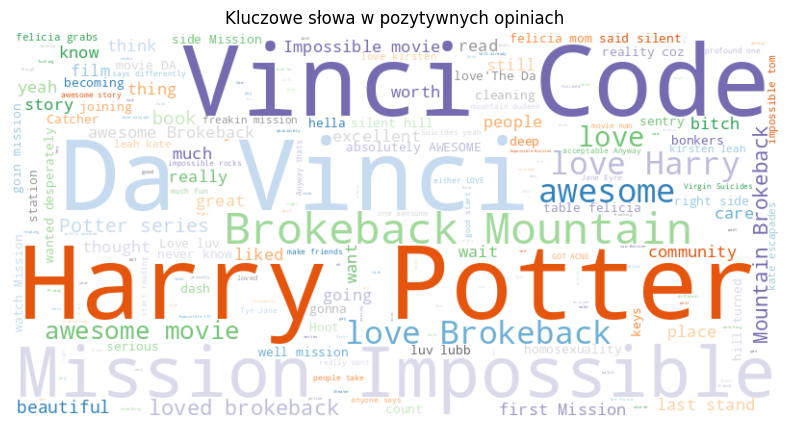

In [ ]:
positive_comments = train_data_df[train_data_df['sentiment']==1]['comment']
text = " ".join(review for review in positive_comments)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab20c').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Kluczowe słowa w pozytywnych opiniach")
plt.axis('off')
plt.show()

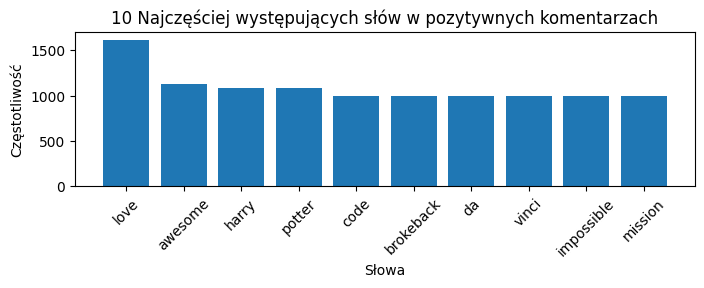

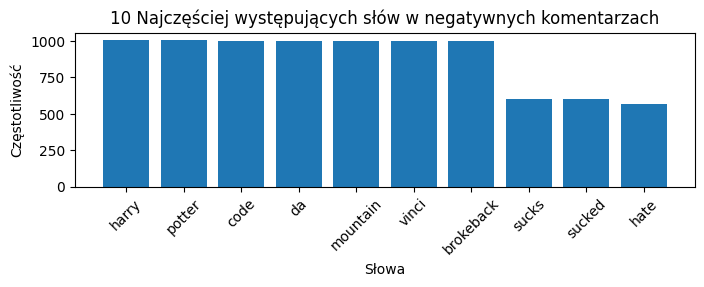

In [ ]:
vectorizer = CountVectorizer(stop_words='english')

positive_comments = train_data_df[train_data_df['sentiment'] == 1]['comment']
positive_matrix = vectorizer.fit_transform(positive_comments)
positive_freq = zip(vectorizer.get_feature_names_out(), positive_matrix.sum(axis=0).tolist()[0])
positive_freq = sorted(positive_freq, key=lambda x: -x[1])

negative_comments = train_data_df[train_data_df['sentiment'] == 0]['comment']
negative_matrix = vectorizer.fit_transform(negative_comments)
negative_freq = zip(vectorizer.get_feature_names_out(), negative_matrix.sum(axis=0).tolist()[0])
negative_freq = sorted(negative_freq, key=lambda x: -x[1])

#Create histogram for top frequent words in positive comments
labels_pos, values_pos = zip(*positive_freq[:10])
plt.figure(figsize=(8,2))
plt.bar(labels_pos, values_pos)
plt.title('10 Najczęściej występujących słów w pozytywnych komentarzach')
plt.ylabel('Częstotliwość')
plt.xlabel('Słowa')
plt.xticks(rotation=45)
plt.show()
#Create histogram for top frequent words in negative comments
labels_neg, values_neg = zip(*negative_freq[:10])
plt.figure(figsize=(8,2))
plt.bar(labels_neg, values_neg)
plt.title('10 Najczęściej występujących słów w negatywnych komentarzach')
plt.ylabel('Częstotliwość')
plt.xlabel('Słowa')
plt.xticks(rotation=45)
plt.show()

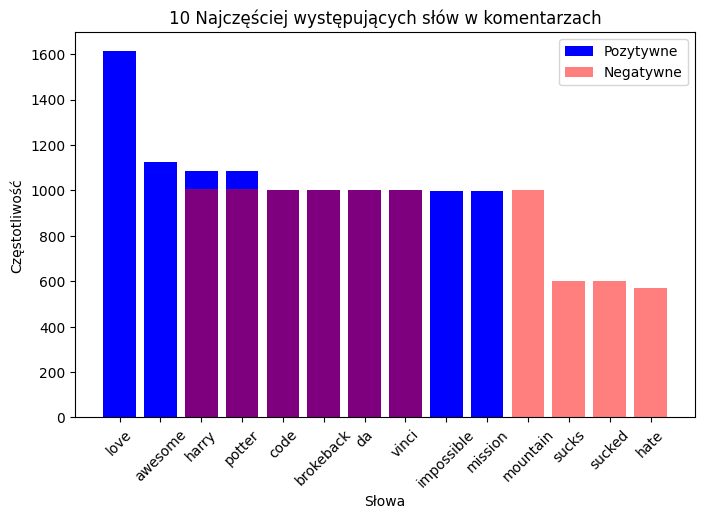

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(labels_pos, values_pos, color='blue', label='Pozytywne')
ax.bar(labels_neg, values_neg, color='red', label='Negatywne', alpha=0.5)
ax.set_title('10 Najczęściej występujących słów w komentarzach')
ax.set_ylabel('Częstotliwość')
ax.set_xlabel('Słowa')
ax.legend()
plt.xticks(rotation=45)
plt.show()

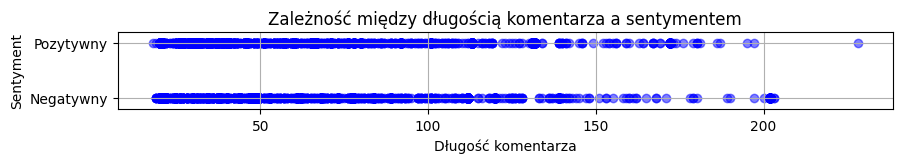

In [ ]:
plt.figure(figsize=(10, 1))
plt.scatter(train_data_df['comment'].apply(len), train_data_df['sentiment'], color='blue', alpha=0.5)  # Set transparency for better visibility when points overlap
plt.title('Zależność między długością komentarza a sentymentem')
plt.xlabel('Długość komentarza')
plt.ylabel('Sentyment')
plt.yticks([0, 1], ["Negatywny", "Pozytywny"])
plt.ylim(-0.2, 1.2)
plt.grid(True)
plt.show()

In [ ]:
#Dictionary to store sentiment lists for every word
sentiment_dict = defaultdict(list)

rows = []
for _, row in train_data_df.iterrows():
    words = row['comment'].lower().split()
    for word in words:
        sentiment_dict[word].append(row['sentiment'])

def determine_color(sentiments):
    if all(s == 1 for s in sentiments):
        return 'green'
    elif all(s == 0 for s in sentiments):
        return 'red'
    else:
        return 'orange'

color_dict = {word: determine_color(sentiments) for word, sentiments in sentiment_dict.items()}

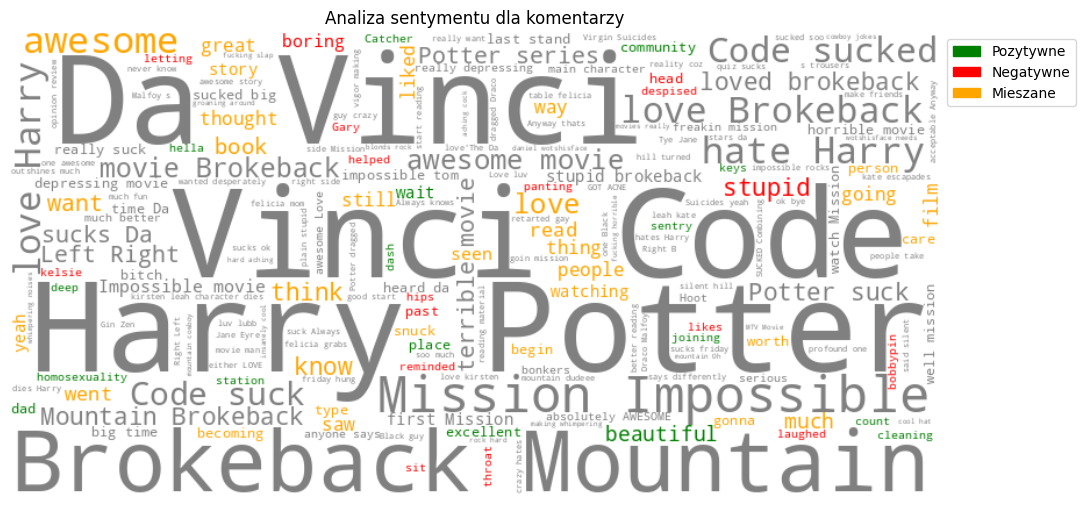

In [ ]:
#Function color_func use color dictionary
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return color_dict.get(word.lower(), 'grey')

text = ' '.join(train_data_df['comment'])

wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(text)
legend_elements = [
    mpatches.Patch(color='green', label='Pozytywne'),
    mpatches.Patch(color='red', label='Negatywne'),
    mpatches.Patch(color='orange', label='Mieszane')
]
plt.figure(figsize=(12, 7))
#plt.subplot(121)  # Użyj subplot, aby zrobić miejsce na legendę
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Analiza sentymentu dla komentarzy')
plt.axis('off')
plt.show()


In [ ]:
#Preprocessing

In [ ]:
def stem_tokens(tokens, stemmer):
  return [stemmer.stem(item) for item in tokens]

def tokenize(text):
  text = re.sub("[^a-zA-Z]", " ", text) #remove non letters
  tokens = nltk.word_tokenize(text) #tokenize
  stems = stem_tokens(tokens, PorterStemmer()) #stem
  return stems

In [ ]:
count_vect = CountVectorizer(analyzer='word', tokenizer=tokenize, lowercase=True, max_features=100, token_pattern=None)
#fits the model, model learns the vocabulary and transforms corpus data into feature vectors
comment_tf = count_vect.fit_transform(train_data_df.comment.tolist() + test_data_df.comment.tolist())
#to numpy
comment_tf_nd = comment_tf.toarray()
comment_tf_nd.shape

(40138, 100)

In [ ]:
print("Comments term frequency (CountVectorize): ")
pd.DataFrame(comment_tf_nd, columns=count_vect.get_feature_names_out()).head(5)

Comments term frequency (CountVectorize): 


aaa  airlin  amaz  angelina  awesom  beauti  becaus  big  boston  \
0    0       0     0         0       1       0       0    0       0   
1    0       0     0         0       0       0       0    0       0   
2    0       0     0         0       0       0       0    0       0   
3    0       0     0         0       0       0       0    0       0   
4    0       0     0         0       0       0       0    0       0   

   brokeback  ...  toyota  ucla  ve  vinci  wa  want  way  whi  work  world  
0          0  ...       0     0   0      1   0     0    0    0     0      0  
1          0  ...       0     0   1      1   1     0    0    0     0      0  
2          0  ...       0     0   0      1   0     0    0    0     0      0  
3          0  ...       0     0   0      1   0     0    0    0     0      0  
4          0  ...       0     0   0      1   0     0    0    0     0      0  

[5 rows x 100 columns]

In [ ]:
tfidf_vect = TfidfVectorizer(analyzer='word', tokenizer=tokenize, lowercase=True, max_features=100, smooth_idf=False, token_pattern=None)
comment_tfidf = tfidf_vect.fit_transform(train_data_df.comment.tolist() + test_data_df.comment.tolist())
comment_tfidf_nd = comment_tfidf.toarray()
print(comment_tfidf_nd.shape)

(40138, 100)


In [ ]:
print("Comments term frequency-inverse document frequency (tf-idf):")
pd.DataFrame(comment_tfidf_nd, columns=tfidf_vect.get_feature_names_out()).head(5)

Comments term frequency-inverse document frequency (tf-idf):


aaa  airlin  amaz  angelina    awesom  beauti  becaus  big  boston  \
0  0.0     0.0   0.0       0.0  0.391895     0.0     0.0  0.0     0.0   
1  0.0     0.0   0.0       0.0  0.000000     0.0     0.0  0.0     0.0   
2  0.0     0.0   0.0       0.0  0.000000     0.0     0.0  0.0     0.0   
3  0.0     0.0   0.0       0.0  0.000000     0.0     0.0  0.0     0.0   
4  0.0     0.0   0.0       0.0  0.000000     0.0     0.0  0.0     0.0   

   brokeback  ...  toyota  ucla        ve     vinci        wa  want  way  whi  \
0        0.0  ...     0.0   0.0  0.000000  0.442319  0.000000   0.0  0.0  0.0   
1        0.0  ...     0.0   0.0  0.384584  0.310759  0.272596   0.0  0.0  0.0   
2        0.0  ...     0.0   0.0  0.000000  0.420995  0.000000   0.0  0.0  0.0   
3        0.0  ...     0.0   0.0  0.000000  0.420995  0.000000   0.0  0.0  0.0   
4        0.0  ...     0.0   0.0  0.000000  0.421334  0.000000   0.0  0.0  0.0   

   work  world  
0   0.0    0.0  
1   0.0    0.0  
2   0.0    0.0  
3   0.0    0.0  
4   0.0    0.0  

[5 rows x 100 columns]

In [ ]:
#words in vocabulary
vocab = count_vect.get_feature_names_out()
print(vocab)

['a' 'aaa' 'about' 'an' 'and' 'angelina' 'are' 'as' 'at' 'awesom' 'be'
 'beauti' 'becaus' 'been' 'boston' 'brokeback' 'but' 'by' 'can' 'code'
 'cruis' 'da' 'even' 'for' 'francisco' 'geico' 'go' 'great' 'harri'
 'harvard' 'hate' 'have' 'he' 'hilton' 'honda' 'i' 'imposs' 'in' 'is' 'it'
 'joli' 'just' 'laker' 'like' 'london' 'love' 'm' 'macbook' 'me' 'miss'
 'mission' 'mit' 'more' 'mountain' 'movi' 'much' 'my' 'need' 'not' 'of'
 'on' 'one' 'or' 'out' 'pari' 'peopl' 'potter' 'purdu' 'realli' 's' 'san'
 'seattl' 'shanghai' 'so' 'still' 'stupid' 'suck' 't' 'than' 'that' 'the'
 'thi' 'think' 'to' 'tom' 'too' 'toyota' 'ucla' 'up' 'vinci' 'wa' 'want'
 'way' 'we' 'when' 'which' 'who' 'with' 'would' 'you']


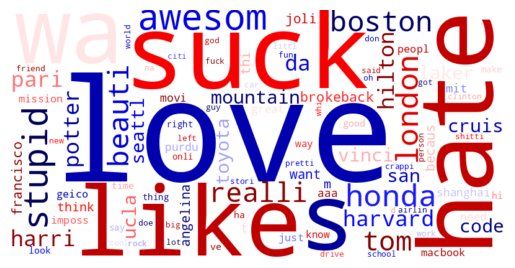

In [ ]:
sum_vocab = np.sum(comment_tf_nd, axis=0)
word_frequencies = dict(zip(vocab, sum_vocab))
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap='seismic',).generate_from_frequencies(word_frequencies)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Classification**

In [10]:
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
model_metrics = {}
model_metrics_temp = {}
#     }
def add_model_metrics(model_name, y_test, y_pred, y_probs, dict_name = "final"):

    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_probs)
    pr_auc = metrics.auc(recall, precision)

    if dict_name == "final":
      model_metrics[model_name] = {
        'y_pred' : y_pred,
        'y_probs' : y_probs,
        'auc': metrics.roc_auc_score(y_test, y_probs),
        'precision': metrics.precision_score(y_test, y_pred),
        'recall': metrics.recall_score(y_test, y_pred),
        'f1_score': metrics.f1_score(y_test, y_pred),
        'roc_auc': metrics.roc_auc_score(y_test, y_pred),
        'pr_auc': pr_auc,
        'log_loss': metrics.log_loss(y_test, y_probs)
      }
    if dict_name == "selection":
      model_metrics_temp[model_name] = {
          'y_pred' : y_pred,
          'y_probs' : y_probs,
          'auc': metrics.roc_auc_score(y_test, y_probs),
          'precision': metrics.precision_score(y_test, y_pred),
          'recall': metrics.recall_score(y_test, y_pred),
          'f1_score': metrics.f1_score(y_test, y_pred),
          'roc_auc': metrics.roc_auc_score(y_test, y_pred),
          'pr_auc': pr_auc,
          'log_loss': metrics.log_loss(y_test, y_probs)
          }

In [11]:
def calculate_weighted_score(metrics, weights):
    total_weight = sum(weights.values())
    aggregated_score = sum(metrics[metric] * weights[metric] for metric in metrics if metric in weights)

    if total_weight == 0:
        raise ValueError("The sum of the weights cannot be equal to zero.")

    return aggregated_score / total_weight

In [12]:
def calculate_aggregated_metric_from_dict(data, weights):

    normalized_data = {key.capitalize(): value for key, value in data.items() if key.capitalize() in weights}
    return calculate_weighted_score(normalized_data, weights)

In [13]:
def select_best_model(model_metrics_temp=model_metrics_temp, drop = True):
  best_model = None
  best_score = -float('inf')  # Initialize to negative infinity
  best_model_metrics = {}

  for model_name, model_measures in model_metrics_temp.items():
    weights = {'Precision': 0.2, 'Recall': 0.2, 'F1 Score': 0.3, 'Auc': 0.2}

    normalized_measures = {key.capitalize(): value for key, value in model_measures.items() if key.capitalize() in weights}

    # Normalize keys and calculate the score using weighted sum of the selected metrics
    score = calculate_aggregated_metric_from_dict(normalized_measures, weights)
    print("Model name: ", model_name, "-> SCORE: ", score)

    # Check if this model has a higher score
    if score > best_score:
      best_score = score
      best_model = model_name
      best_model_metrics = model_measures

  # Display the best model's metrics
  if best_model:
    print(f"Selected best model: {best_model}")
    # Save the best model metrics to a new dictionary for further usage
    model_metrics[best_model] = best_model_metrics
    #for key, value in best_model_metrics.items():
    print("Best model metrics:")
    print(*(f"{k}: {v}" for k, v in list(best_model_metrics.items())[2:]), sep="\n")
    if drop == True:
      model_metrics_temp.clear()
  else:
    print("No valid models were found.")

In [ ]:
select_best_model()

Model name:  log_sw -> SCORE:  0.5856558172549684
Model name:  log_tfidf -> SCORE:  0.66142900123064
Selected best model: log_tfidf
Best model metrics:
auc: 0.9984525275599014
precision: 0.988988988988989
recall: 0.988988988988989
f1_score: 0.988988988988989
roc_auc: 0.9873793586600832
pr_auc: 0.998991728363986
log_loss: 0.04341056431202173


In [ ]:
# find some good and bad words
df = pd.DataFrame(comment_tf_nd, columns=count_vect.get_feature_names_out())
selected_words = ['awesom', 'good', 'great', 'like', 'shitti', 'stupid', 'suck']
sum_data = dict()

for word in selected_words:
  if word in df.columns.to_list():
    sum_data[word] = df[word].sum()
  else:
    print("Word:", word, "not within the list")
print("Word frequency:", sum_data)

Word: good not within the list
Word: shitti not within the list
Word frequency: {'awesom': 3170, 'great': 1178, 'like': 4080, 'stupid': 2886, 'suck': 4614}


In [ ]:
#sum_data
df_subset = df[sum_data.keys()]
X_train, X_test, y_train, y_test  = train_test_split(df_subset[0:len(train_data_df)], train_data_df.sentiment,
                                                     train_size=0.75, random_state=1,
                                                     stratify=train_data_df.sentiment)

# **Logistic Regression**

In [15]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarnings
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
# Setup the pipeline
pipeline = make_pipeline(StandardScaler(), LogisticRegression())

# Parameter grid for GridSearchCV
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  # Values of C (inverse of regularization strength)
    'logisticregression__penalty': ['l1', 'l2'],  # Types of regularization
    'logisticregression__solver': ['liblinear', 'saga']  # Solvers that support L1 regularization
}

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # Number of folds in cross-validation
    scoring='roc_auc',
    verbose=1
)

# Fitting grid search
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X=X_test)
y_pred_prob_sw = best_model.predict_proba(X=X_test)[:,1]
fpr_sw, tpr_sw, thresholds = metrics.roc_curve(y_test, y_pred_prob_sw)
roc_auc_sw = metrics.auc(fpr_sw, tpr_sw)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}


In [ ]:
add_model_metrics('log_sw', y_test, y_pred, y_pred_prob_sw, "selection")

In [ ]:
#tf-idf linear classifier
# train and validation set split
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(comment_tfidf_nd[0:len(train_data_df)],
                                                                             train_data_df.sentiment,
                                                                             train_size=0.75,
                                                                             random_state=1,
                                                                             stratify=train_data_df.sentiment)


In [14]:
X = train_data_df['comment']
y = train_data_df['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Setup the pipeline
pipeline = make_pipeline(TfidfVectorizer(), StandardScaler(with_mean=False), LogisticRegression())

# Parameter grid for GridSearchCV
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  # Values of C (inverse of regularization strength)
    'logisticregression__penalty': ['l1', 'l2'],  # Types of regularization
    'logisticregression__solver': ['liblinear', 'saga']  # Solvers that support L1 regularization
}

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # Number of folds in cross-validation
    scoring='roc_auc',
    verbose=1
)

# Fitting grid search
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model_lr_ss_tfidf = grid_search.best_estimator_

# Predictions with the best model
y_pred_lr_ss_tfidf = best_model_lr_ss_tfidf.predict(X=X_test)
y_pred_prob_lr_ss_tfidf = best_model_lr_ss_tfidf.predict_proba(X=X_test)[:, 1]
print(metrics.classification_report(y_test, y_pred_lr_ss_tfidf))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'logisticregression__C': 1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       626
           1       0.99      0.99      0.99       792

    accuracy                           0.99      1418
   macro avg       0.99      0.99      0.99      1418
weighted avg       0.99      0.99      0.99      1418



In [22]:
fpr_lr_ss_tfidf, tpr_lr_ss_tfidf, thresholds = metrics.roc_curve(y_test, y_pred_prob_lr_ss_tfidf)
roc_auc_lr_ss_tfidf = metrics.auc(fpr_lr_ss_tfidf, tpr_lr_ss_tfidf)
roc_auc_lr_ss_tfidf

0.9984408784328912

In [ ]:
add_model_metrics('logreg_standscal_tfidf', y_test, y_pred_lr_ss_tfidf, y_pred_prob_lr_ss_tfidf, "selection")

In [23]:
# Setup the pipeline
pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression())

# Parameter grid for GridSearchCV
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  # Values of C (inverse of regularization strength)
    'logisticregression__penalty': ['l1', 'l2'],  # Types of regularization
    'logisticregression__solver': ['liblinear', 'saga']  # Solvers that support L1 regularization
}

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # Number of folds in cross-validation
    scoring='roc_auc',
    verbose=1
)

# Fitting grid search
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model_lr_tfidf = grid_search.best_estimator_

# Predictions with the best model
y_pred_lr_tfidf = best_model_lr_tfidf.predict(X=X_test)
y_pred_prob_lr_tfidf = best_model_lr_tfidf.predict_proba(X=X_test)[:, 1]
print(metrics.classification_report(y_test, y_pred_lr_tfidf))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'logisticregression__C': 100, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       626
           1       0.99      0.99      0.99       792

    accuracy                           0.99      1418
   macro avg       0.99      0.99      0.99      1418
weighted avg       0.99      0.99      0.99      1418



In [24]:
fpr_lr_tfidf, tpr_lr_tfidf, thresholds = metrics.roc_curve(y_test, y_pred_prob_lr_tfidf)
roc_auc_lr_tfidf = metrics.auc(fpr_lr_tfidf, tpr_lr_tfidf)

In [25]:
add_model_metrics('logreg_tfidf', y_test, y_pred_lr_tfidf, y_pred_prob_lr_tfidf, "selection")

In [34]:
# Setup the pipeline with CountVectorizer
pipeline = make_pipeline(
    CountVectorizer(),
    StandardScaler(with_mean=False),  # Necessary for handling sparse matrices
    LogisticRegression()
)

# Parameter grid for GridSearchCV
param_grid = {
    'countvectorizer__max_features': [1000, 5000, 10000],  # Optional: limit the number of features
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['liblinear', 'saga']
}

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=1
)

# Fitting grid search
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model_lr_ss_tf = grid_search.best_estimator_

# Predictions with the best model
y_pred_lr_ss_tf = best_model_lr_ss_tf.predict(X_test)
y_pred_prob_lr_ss_tf = best_model_lr_ss_tf.predict_proba(X_test)[:, 1]
print(metrics.classification_report(y_test, y_pred_lr_ss_tf))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'countvectorizer__max_features': 5000, 'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       626
           1       0.99      0.99      0.99       792

    accuracy                           0.99      1418
   macro avg       0.99      0.99      0.99      1418
weighted avg       0.99      0.99      0.99      1418



In [35]:
fpr_lr_ss_tf, tpr_lr_ss_tf, thresholds = metrics.roc_curve(y_test, y_pred_prob_lr_ss_tf)
roc_auc_lr_ss_tf = metrics.auc(fpr_lr_ss_tf, tpr_lr_ss_tf)

In [36]:
add_model_metrics('logreg_standardscaler_tf', y_test, y_pred_lr_ss_tf, y_pred_prob_lr_ss_tf, "selection")

In [29]:
# Setup the pipeline with CountVectorizer
pipeline = make_pipeline(
    CountVectorizer(),  # Necessary for handling sparse matrices
    LogisticRegression()
)

# Parameter grid for GridSearchCV
param_grid = {
    'countvectorizer__max_features': [1000, 5000, 10000],  # Optional: limit the number of features
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['liblinear', 'saga']
}

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=1
)

# Fitting grid search
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model_lr_tf = grid_search.best_estimator_

# Predictions with the best model
y_pred_lr_tf = best_model_lr_tf.predict(X_test)
y_pred_prob_lr_tf = best_model_lr_tf.predict_proba(X_test)[:, 1]
print(metrics.classification_report(y_test, y_pred_lr_tf))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'countvectorizer__max_features': 5000, 'logisticregression__C': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       626
           1       0.99      0.99      0.99       792

    accuracy                           0.99      1418
   macro avg       0.99      0.99      0.99      1418
weighted avg       0.99      0.99      0.99      1418



In [30]:
fpr_lr_tf, tpr_lr_tf, thresholds = metrics.roc_curve(y_test, y_pred_prob_lr_tf)
roc_auc_lr_tf = metrics.auc(fpr_lr_tf, tpr_lr_tf)

In [31]:
add_model_metrics('logreg_tf', y_test, y_pred_lr_tf, y_pred_prob_lr_tf, "selection")

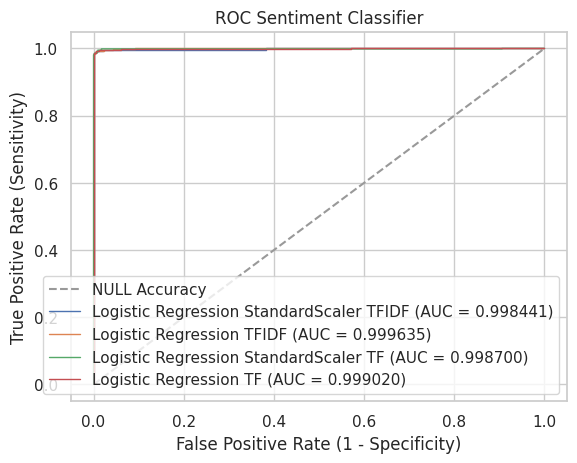

In [37]:
# ROC curves of both the Classifiers
sns.set(style='whitegrid', context='notebook')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='NULL Accuracy')
plt.plot(fpr_sw, tpr_sw, lw=1, label='Logistic Regression SW (AUC = %0.6f)' % roc_auc_sw)
plt.plot(fpr_lr_ss_tfidf, tpr_lr_ss_tfidf, lw=1, label='Logistic Regression StandardScaler TFIDF (AUC = %0.6f)' % roc_auc_lr_ss_tfidf)
plt.plot(fpr_lr_tfidf, tpr_lr_tfidf, lw=1, label='Logistic Regression TFIDF (AUC = %0.6f)' % roc_auc_lr_tfidf)
plt.plot(fpr_lr_ss_tf, tpr_lr_ss_tf, lw=1, label='Logistic Regression StandardScaler TF (AUC = %0.6f)' % roc_auc_lr_ss_tf)
plt.plot(fpr_lr_tf, tpr_lr_tf, lw=1, label='Logistic Regression TF (AUC = %0.6f)' % roc_auc_lr_tf)
plt.title('ROC Sentiment Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

**Select the best Logistic Regression model** </br>
**Calculate the mean of the metrics for each model and finds the model with the best (highest) score**



In [41]:
#Choose the best model
select_best_model()

Model name:  logreg_tfidf -> SCORE:  0.6634948522711374
Model name:  logreg_tf -> SCORE:  0.6630818300147374
Model name:  logreg_standardscaler_tf -> SCORE:  0.6624453584205745
Selected best model: logreg_tfidf
Best model metrics:
auc: 0.9996349275502631
precision: 0.9949302915082383
recall: 0.9911616161616161
f1_score: 0.9930423782416192
roc_auc: 0.9923859199018943
pr_auc: 0.9997214359529438
log_loss: 0.02403957308991018


# **VADER SentimentIntensityAnalyzer**

In [ ]:
# sia = SentimentIntensityAnalyzer()
# train_data_df['vader_score'] = train_data_df['comment'].apply(lambda x: sia.polarity_scores(x)['compound'])
# train_data_df['vader_pred'] = train_data_df['vader_score'].apply(lambda x: 1 if x >= 0 else 0)

# fpr_vader, tpr_vader, thresholds_vader = metrics.roc_curve(train_data_df['sentiment'], train_data_df['vader_score'])
# roc_auc_vader = metrics.auc(fpr_vader, tpr_vader)

# add_model_metrics('VADER_SentimentAnalysis', train_data_df['sentiment'], train_data_df['vader_pred'], train_data_df['vader_score'], "selection")

0.9389753610648056


In [ ]:
vader_data_df = train_data_df

sia = SentimentIntensityAnalyzer()
vader_data_df['vader_score'] = vader_data_df['comment'].apply(lambda x: sia.polarity_scores(x)['compound'])
vader_data_df['vader_pred'] = vader_data_df['vader_score'].apply(lambda x: 1 if x >= 0 else 0)

In [ ]:
fpr_vader, tpr_vader, thresholds_vader = metrics.roc_curve(train_data_df['sentiment'], train_data_df['vader_score'])
roc_auc_vader = metrics.auc(fpr_vader, tpr_vader)
roc_auc_vader

0.9389753610648056

In [ ]:
add_model_metrics('VADER', vader_data_df['sentiment'], vader_data_df['vader_pred'], vader_data_df['vader_score'], "selection")

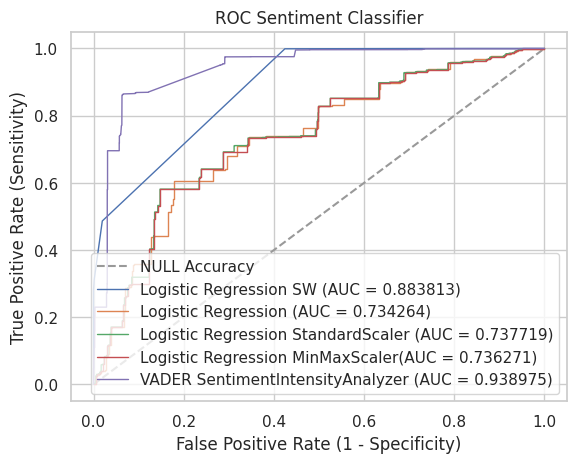

In [ ]:
sns.set(style='whitegrid', context='notebook')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='NULL Accuracy')
plt.plot(fpr_sw, tpr_sw, lw=1, label='Logistic Regression SW (AUC = %0.6f)' % roc_auc_sw)
plt.plot(fpr_lr_ss_tfidf, tpr_lr_ss_tfidf, lw=1, label='Logistic Regression StandardScaler TFIDF (AUC = %0.6f)' % roc_auc_lr_ss_tfidf)
plt.plot(fpr_lr_tfidf, tpr_lr_tfidf, lw=1, label='Logistic Regression TFIDF (AUC = %0.6f)' % roc_auc_lr_tfidf)
plt.plot(fpr_lr_ss_tf, tpr_lr_ss_tf, lw=1, label='Logistic Regression StandardScaler TF (AUC = %0.6f)' % roc_auc_lr_ss_tf)
plt.plot(fpr_lr_tf, tpr_lr_tf, lw=1, label='Logistic Regression TF (AUC = %0.6f)' % roc_auc_lr_tf)
plt.plot(fpr_vader, tpr_vader, lw=1, label='VADER SentimentIntensityAnalyzer (AUC = %0.6f)' % roc_auc_vader)
plt.title('ROC Sentiment Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

In [ ]:
#Lemmatization with VADER
#Lemmatize the entire text without dividing it into sentences -> This simplifies the process, but may not take into account some of the linguistic nuances that arise from sentence structure.
#Lemmatization without specifying the part of speech

def lemmatize_text(text):
  lemmatizer = WordNetLemmatizer()
  word_tokens = word_tokenize(text)
  return ' '.join([lemmatizer.lemmatize(w) for w in word_tokens])

In [ ]:
tf.get_logger().setLevel('ERROR')  # Ignore anything less severe than ERROR
vader_lemmatizer_data_df = train_data_df

sia_lemmatizer = SentimentIntensityAnalyzer()
vader_lemmatizer_data_df['lemmatized_comment'] = vader_lemmatizer_data_df['comment'].apply(lemmatize_text)
vader_lemmatizer_data_df['vader_lemma_score'] = vader_lemmatizer_data_df['lemmatized_comment'].apply(lambda x: sia_lemmatizer.polarity_scores(x)['compound'])
vader_lemmatizer_data_df['vader_lemma_pred'] = vader_lemmatizer_data_df['vader_lemma_score'].apply(lambda x: 1 if x >= 0 else 0)

In [ ]:
fpr_vader_lemmatizer, tpr_vader_lemmatizer, thresholds = metrics.roc_curve(vader_lemmatizer_data_df['sentiment'], vader_lemmatizer_data_df['vader_score'])
roc_auc_vader_lemmatizer = metrics.auc(fpr_vader_lemmatizer, tpr_vader_lemmatizer)

In [ ]:
add_model_metrics('VADER_Lemma', vader_lemmatizer_data_df['sentiment'], vader_lemmatizer_data_df['vader_lemma_pred'],
                  vader_lemmatizer_data_df['vader_lemma_score'], "selection")

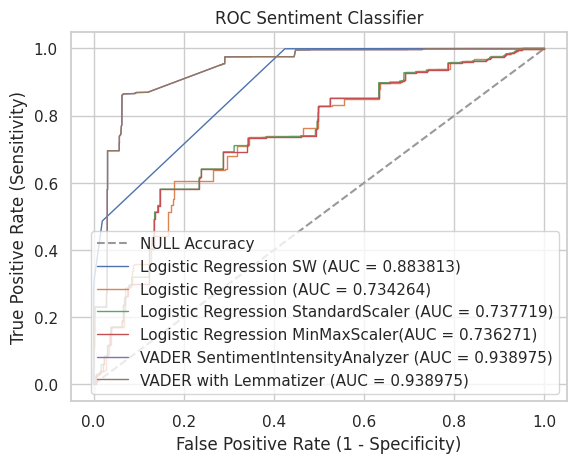

In [ ]:
sns.set(style='whitegrid', context='notebook')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='NULL Accuracy')
plt.plot(fpr_sw, tpr_sw, lw=1, label='Logistic Regression SW (AUC = %0.6f)' % roc_auc_sw)
plt.plot(fpr_lr_ss_tfidf, tpr_lr_ss_tfidf, lw=1, label='Logistic Regression StandardScaler TFIDF (AUC = %0.6f)' % roc_auc_lr_ss_tfidf)
plt.plot(fpr_lr_tfidf, tpr_lr_tfidf, lw=1, label='Logistic Regression TFIDF (AUC = %0.6f)' % roc_auc_lr_tfidf)
plt.plot(fpr_lr_ss_tf, tpr_lr_ss_tf, lw=1, label='Logistic Regression StandardScaler TF (AUC = %0.6f)' % roc_auc_lr_ss_tf)
plt.plot(fpr_lr_tf, tpr_lr_tf, lw=1, label='Logistic Regression TF (AUC = %0.6f)' % roc_auc_lr_tf)
plt.plot(fpr_vader, tpr_vader, lw=1, label='VADER SentimentIntensityAnalyzer (AUC = %0.6f)' % roc_auc_vader)
plt.plot(fpr_vader_lemmatizer, tpr_vader_lemmatizer, lw=1, label='VADER with Lemmatizer (AUC = %0.6f)' % roc_auc_vader_lemmatizer)
plt.title('ROC Sentiment Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

In [ ]:
def lemmatize_text(text):
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)
    lemmatized_text = []

    # Process each sentence
    for sentence in sentences:
        words = word_tokenize(sentence)
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
        lemmatized_text.append(' '.join(lemmatized_words))

    # Join the lemmatized sentences back into a single string
    return ' '.join(lemmatized_text)

In [ ]:
vader_lemma_div_data_df = train_data_df

# Sentiment analysis
sia_vader_lemma_div = SentimentIntensityAnalyzer()

vader_lemma_div_data_df['vader_lemma_div_comment'] = vader_lemma_div_data_df['comment'].apply(lemmatize_text)
vader_lemma_div_data_df['vader_lemma_div_score'] = vader_lemma_div_data_df['vader_lemma_div_comment'].apply(lambda x: sia_vader_lemma_div.polarity_scores(x)['compound'])
vader_lemma_div_data_df['vader_lemma_div_pred'] = vader_lemma_div_data_df['vader_lemma_div_score'].apply(lambda x: 1 if x >= 0 else 0)


In [ ]:
fpr_vader_lemma_div, tpr_vader_lemma_div, thresholds = metrics.roc_curve(vader_lemma_div_data_df['sentiment'], vader_lemma_div_data_df['vader_lemma_div_score'])
roc_auc_vader_lemma_div = metrics.auc(fpr_vader_lemma_div, tpr_vader_lemma_div)

In [ ]:
add_model_metrics('VADER_Lemma_Div', vader_lemma_div_data_df['sentiment'], vader_lemma_div_data_df['vader_lemma_div_pred'],
                  vader_lemma_div_data_df['vader_lemma_div_score'], "selection")

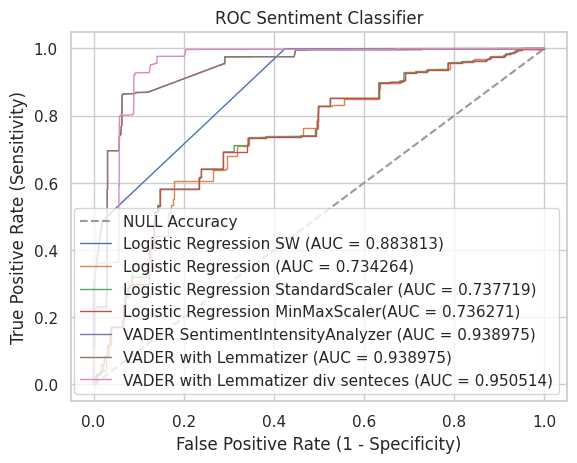

In [ ]:
sns.set(style='whitegrid', context='notebook')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='NULL Accuracy')
plt.plot(fpr_sw, tpr_sw, lw=1, label='Logistic Regression SW (AUC = %0.6f)' % roc_auc_sw)
plt.plot(fpr_lr_ss_tfidf, tpr_lr_ss_tfidf, lw=1, label='Logistic Regression StandardScaler TFIDF (AUC = %0.6f)' % roc_auc_lr_ss_tfidf)
plt.plot(fpr_lr_tfidf, tpr_lr_tfidf, lw=1, label='Logistic Regression TFIDF (AUC = %0.6f)' % roc_auc_lr_tfidf)
plt.plot(fpr_lr_ss_tf, tpr_lr_ss_tf, lw=1, label='Logistic Regression StandardScaler TF (AUC = %0.6f)' % roc_auc_lr_ss_tf)
plt.plot(fpr_lr_tf, tpr_lr_tf, lw=1, label='Logistic Regression TF (AUC = %0.6f)' % roc_auc_lr_tf)
plt.plot(fpr_vader, tpr_vader, lw=1, label='VADER SentimentIntensityAnalyzer (AUC = %0.6f)' % roc_auc_vader)
plt.plot(fpr_vader_lemmatizer, tpr_vader_lemmatizer, lw=1, label='VADER with Lemmatizer (AUC = %0.6f)' % roc_auc_vader_lemmatizer)
plt.plot(fpr_vader_lemma_div, tpr_vader_lemma_div, lw=1, label='VADER with Lemmatizer div sentences (AUC = %0.6f)' % roc_auc_vader_lemma_div)
plt.title('ROC Sentiment Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

In [ ]:
# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to map NLTK POS tags to WordNet POS tags - Map NLTK POS tag to a format recognized by WordNetLemmatizer
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()  # Get the first character of the POS tag
    tag_dict = {
        "J": corpus.wordnet.ADJ,
        "N": corpus.wordnet.NOUN,
        "V": corpus.wordnet.VERB,
        "R": corpus.wordnet.ADV
    }
    return tag_dict.get(tag, corpus.wordnet.NOUN)  # Default to noun if no match

# Function to lemmatize text with proper POS tagging - Lemmatize text with POS tag mapping for better accuracy
def lemmatize_text(text):
    sentences = sent_tokenize(text)
    lemmatized_text = []

    for sentence in sentences:
        words = word_tokenize(sentence)
        lemmatized_sentence = ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words])
        lemmatized_text.append(lemmatized_sentence)

    return ' '.join(lemmatized_text)

In [ ]:
vader_lemma2_data_df = train_data_df

# Sentiment analysis
sia_vader_lemma2 = SentimentIntensityAnalyzer()

vader_lemma2_data_df['vader_lemma2_comment'] = vader_lemma2_data_df['comment'].apply(lemmatize_text)
vader_lemma2_data_df['vader_lemma2_score'] = vader_lemma2_data_df['vader_lemma2_comment'].apply(lambda x: sia_vader_lemma2.polarity_scores(x)['compound'])
vader_lemma2_data_df['vader_lemma2_pred'] = vader_lemma2_data_df['vader_lemma2_score'].apply(lambda x: 1 if x >= 0 else 0)


In [ ]:
fpr_vader_lemma2, tpr_vader_lemma2, thresholds = metrics.roc_curve(vader_lemma2_data_df['sentiment'], vader_lemma2_data_df['vader_lemma2_score'])
roc_auc_vader_lemma2 = metrics.auc(fpr_vader_lemma2, tpr_vader_lemma2)

In [ ]:
add_model_metrics('VADER_Lemma2', vader_lemma2_data_df['sentiment'], vader_lemma2_data_df['vader_lemma2_pred'],
                  vader_lemma2_data_df['vader_lemma2_score'], "selection")

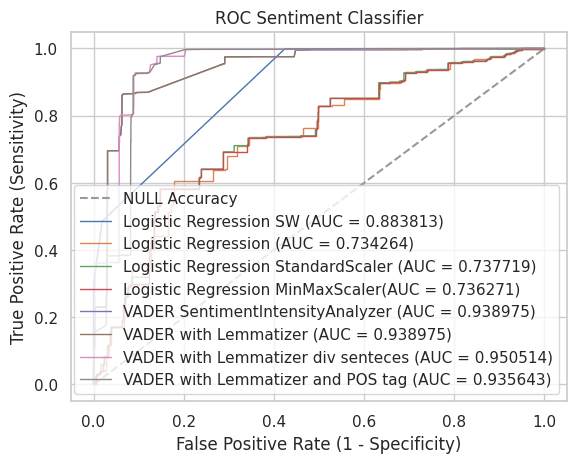

In [ ]:
sns.set(style='whitegrid', context='notebook')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='NULL Accuracy')
plt.plot(fpr_sw, tpr_sw, lw=1, label='Logistic Regression SW (AUC = %0.6f)' % roc_auc_sw)
plt.plot(fpr_lr_ss_tfidf, tpr_lr_ss_tfidf, lw=1, label='Logistic Regression StandardScaler TFIDF (AUC = %0.6f)' % roc_auc_lr_ss_tfidf)
plt.plot(fpr_lr_tfidf, tpr_lr_tfidf, lw=1, label='Logistic Regression TFIDF (AUC = %0.6f)' % roc_auc_lr_tfidf)
plt.plot(fpr_lr_ss_tf, tpr_lr_ss_tf, lw=1, label='Logistic Regression StandardScaler TF (AUC = %0.6f)' % roc_auc_lr_ss_tf)
plt.plot(fpr_lr_tf, tpr_lr_tf, lw=1, label='Logistic Regression TF (AUC = %0.6f)' % roc_auc_lr_tf)
plt.plot(fpr_vader, tpr_vader, lw=1, label='VADER SentimentIntensityAnalyzer (AUC = %0.6f)' % roc_auc_vader)
plt.plot(fpr_vader_lemmatizer, tpr_vader_lemmatizer, lw=1, label='VADER with Lemmatizer (AUC = %0.6f)' % roc_auc_vader_lemmatizer)
plt.plot(fpr_vader_lemma_div, tpr_vader_lemma_div, lw=1, label='VADER with Lemmatizer div sentences (AUC = %0.6f)' % roc_auc_vader_lemma_div)
plt.plot(fpr_vader_lemma2, tpr_vader_lemma2, lw=1, label='VADER with Lemmatizer and POS tag (AUC = %0.6f)' % roc_auc_vader_lemma2)
plt.title('ROC Sentiment Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

**Calculate the mean of the metrics for each model and finds the model with the best (highest) score**

In [ ]:
#Choose the best model
select_best_model()

Model name:  VADER -> SCORE:  0.6007700582032867
Model name:  VADER_Lemma -> SCORE:  0.6242117068114335
Model name:  VADER_Lemma2 -> SCORE:  0.6196786937557361
Selected best model: VADER_Lemma
Best model metrics:
auc: 0.9505137244914278
precision: 0.9067493441450036
recall: 0.9516896120150188
f1_score: 0.928676111382511
roc_auc: 0.912596666246914
pr_auc: 0.9462492044849843
log_loss: 1.7205689597714207


# **K-Neighbors Classifier**

In [ ]:
pipeline = make_pipeline(CountVectorizer(), KNeighborsClassifier())

param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 10, 15],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # Number of folds in cross-validation
    scoring='roc_auc',  # Evaluate model performance with Area Under Curve
    verbose=1  # Higher number gives more info about the process
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model_knn_tf = grid_search.best_estimator_

# Making predictions with the best model
y_pred_knn_tf = best_model_knn_tf.predict(X_test)
y_pred_prob_knn_tf = best_model_knn_tf.predict_proba(X_test)[:,1]

fpr_knn_tf, tpr_knn_tf, thresholds = metrics.roc_curve(y_test, y_pred_prob_knn_tf)
roc_auc_knn_tf = metrics.auc(fpr_knn_tf, tpr_knn_tf)

In [ ]:
add_model_metrics('KNN_tf', y_test, y_pred_knn_tf, y_pred_prob_knn_tf, "selection")

In [48]:
pipeline = make_pipeline(TfidfVectorizer(), KNeighborsClassifier())

param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 10, 15],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # Number of folds in cross-validation
    scoring='roc_auc',  # Evaluate model performance with Area Under Curve
    verbose=1  # Higher number gives more info about the process
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model_knn_tfidf = grid_search.best_estimator_

# Making predictions with the best model
y_pred_knn_tfidf = best_model_knn_tfidf.predict(X_test)
y_pred_prob_knn_tfidf = best_model_knn_tfidf.predict_proba(X_test)[:,1]

fpr_knn_tfidf, tpr_knn_tfidf, thresholds = metrics.roc_curve(y_test, y_pred_prob_knn_tfidf)
roc_auc_knn_tfidf = metrics.auc(fpr_knn_tfidf, tpr_knn_tfidf)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'kneighborsclassifier__metric': 'euclidean', 'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'distance'}


In [ ]:
add_model_metrics('KNN_tfidf', y_test, y_pred_knn_tfidf, y_pred_prob_knn_tfidf, "selection")

In [49]:
pipeline = make_pipeline(TfidfVectorizer(), StandardScaler(with_mean=False), KNeighborsClassifier())

param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 10, 15],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # Number of folds in cross-validation
    scoring='roc_auc',  # Evaluate model performance with Area Under Curve
    verbose=1  # Higher number gives more info about the process
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model_knn_ss_tfidf = grid_search.best_estimator_

# Making predictions with the best model
y_pred_knn_ss_tfidf = best_model_knn_ss_tfidf.predict(X_test)
y_pred_prob_knn_ss_tfidf = best_model_knn_ss_tfidf.predict_proba(X_test)[:,1]

fpr_knn_ss_tfidf, tpr_knn_ss_tfidf, thresholds = metrics.roc_curve(y_test, y_pred_prob_knn_ss_tfidf)
roc_auc_knn_ss_tfidf = metrics.auc(fpr_knn_ss_tfidf, tpr_knn_ss_tfidf)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'kneighborsclassifier__metric': 'euclidean', 'kneighborsclassifier__n_neighbors': 15, 'kneighborsclassifier__weights': 'distance'}


In [50]:
add_model_metrics('KNN_standardscaler_tfidf', y_test, y_pred_knn_ss_tfidf, y_pred_prob_knn_ss_tfidf, "selection")

In [ ]:
pipeline = make_pipeline(CountVectorizer(), StandardScaler(with_mean=False), KNeighborsClassifier())

param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 10, 15],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # Number of folds in cross-validation
    scoring='roc_auc',  # Evaluate model performance with Area Under Curve
    verbose=1  # Higher number gives more info about the process
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model_knn_ss_tf = grid_search.best_estimator_

# Making predictions with the best model
y_pred_knn_ss_tf = best_model_knn_ss_tf.predict(X_test)
y_pred_prob_knn_ss_tf = best_model_knn_ss_tf.predict_proba(X_test)[:,1]

fpr_knn_ss_tf, tpr_knn_ss_tf, thresholds = metrics.roc_curve(y_test, y_pred_prob_knn_ss_tf)
roc_auc_knn_ss_tf = metrics.auc(fpr_knn_ss_tf, tpr_knn_ss_tf)

In [ ]:
add_model_metrics('KNN_standardscaler_tf', y_test, y_pred_knn_ss_tf, y_pred_prob_knn_ss_tf, "selection")

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Pipeline setup with StandardScaler and PCA
pipeline = make_pipeline(TfidfVectorizer(),            # Convert text to TF-IDF feature matrix
                         StandardScaler(with_mean=False),  # Scale data without shifting the mean (suitable for sparse data)
                         TruncatedSVD(n_components=100),
                         KNeighborsClassifier())

param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 10, 15],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # Number of folds in cross-validation
    scoring='roc_auc',  # Evaluate model performance with Area Under Curve
    verbose=1  # Higher number gives more info about the process
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model_knn_ss_pca_tfidf = grid_search.best_estimator_

# Making predictions with the best model
y_pred_knn_ss_pca_tfidf = best_model_knn_ss_pca.predict(X_test)
y_pred_prob_knn_ss_pca_tfidf = best_model_knn_ss_pca.predict_proba(X_test)[:,1]

fpr_knn_ss_pca_tfidf, tpr_knn_ss_pca_tfidf, thresholds = metrics.roc_curve(y_test, y_pred_prob_knn_ss_pca_tfidf)
roc_auc_knn_ss_pca_tfidf = metrics.auc(fpr_knn_ss_pca_tfidf, tpr_knn_ss_pca_tfidf)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 15, 'kneighborsclassifier__weights': 'distance'}


In [ ]:
add_model_metrics('KNN_standardscaler_pca_tfidf', y_test, y_pred_knn_ss_pca_tfidf, y_pred_prob_knn_ss_pca_tfidf, "selection")

In [ ]:
# Pipeline setup with StandardScaler and PCA
pipeline = make_pipeline(CountVectorizer(),            # Convert text to TF-IDF feature matrix
                         StandardScaler(with_mean=False),  # Scale data without shifting the mean (suitable for sparse data)
                         TruncatedSVD(n_components=100),
                         KNeighborsClassifier())

param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 10, 15],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # Number of folds in cross-validation
    scoring='roc_auc',  # Evaluate model performance with Area Under Curve
    verbose=1  # Higher number gives more info about the process
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_model_knn_ss_pca_tf = grid_search.best_estimator_

# Making predictions with the best model
y_pred_knn_ss_pca_tf = best_model_knn_ss_pca_tf.predict(X_test)
y_pred_prob_knn_ss_pca_tf = best_model_knn_ss_pca_tf.predict_proba(X_test)[:,1]

fpr_knn_ss_pca_tf, tpr_knn_ss_pca_tf, thresholds = metrics.roc_curve(y_test, y_pred_prob_knn_ss_pca_tf)
roc_auc_knn_ss_pca_tf = metrics.auc(fpr_knn_ss_pca_tf, tpr_knn_ss_pca_tf)

In [ ]:
add_model_metrics('KNN_standardscaler_pca_tf', y_test, y_pred_knn_ss_pca_tf, y_pred_prob_knn_ss_pca_tf, "selection")

In [ ]:
#Choose the best KNN model
select_best_model()

Model name:  KNN -> SCORE:  0.6463989350819703
Model name:  KNN_standardscaler -> SCORE:  0.6457869508478047
Model name:  KNN_standardscaler_pca -> SCORE:  0.6387118838785601
Selected best model: KNN
Best model metrics:
auc: 0.992308667949923
precision: 0.9479472140762464
recall: 0.9685393258426966
f1_score: 0.9581326417191554
roc_auc: 0.9489110971842964
pr_auc: 0.9947960110553111
log_loss: 0.16520633279408875


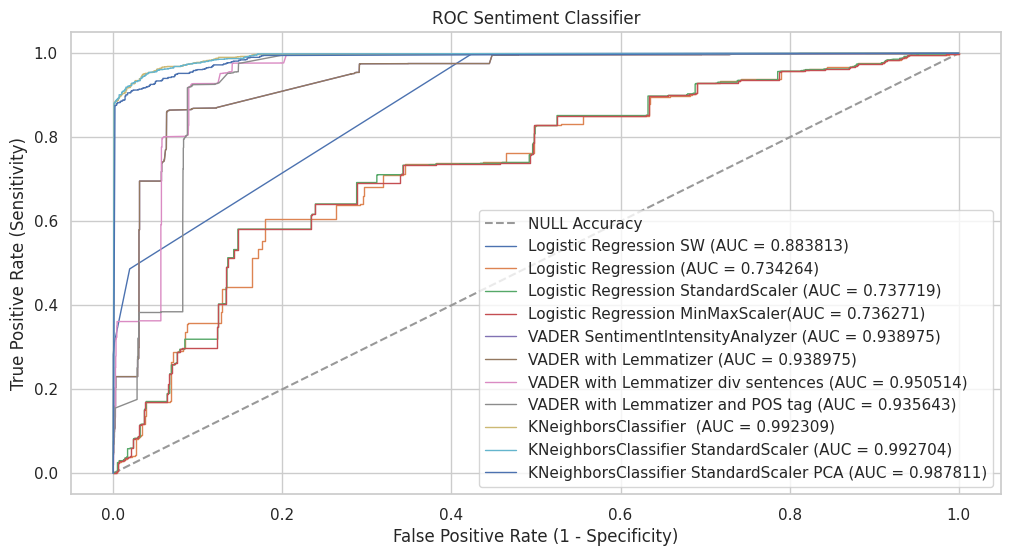

In [ ]:
sns.set(style='whitegrid', context='notebook')
plt.figure(figsize=(12, 6))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='NULL Accuracy')
plt.plot(fpr_sw, tpr_sw, lw=1, label='Logistic Regression SW (AUC = %0.6f)' % roc_auc_sw)
plt.plot(fpr_lr_ss_tfidf, tpr_lr_ss_tfidf, lw=1, label='Logistic Regression StandardScaler TFIDF (AUC = %0.6f)' % roc_auc_lr_ss_tfidf)
plt.plot(fpr_lr_tfidf, tpr_lr_tfidf, lw=1, label='Logistic Regression TFIDF (AUC = %0.6f)' % roc_auc_lr_tfidf)
plt.plot(fpr_lr_ss_tf, tpr_lr_ss_tf, lw=1, label='Logistic Regression StandardScaler TF (AUC = %0.6f)' % roc_auc_lr_ss_tf)
plt.plot(fpr_lr_tf, tpr_lr_tf, lw=1, label='Logistic Regression TF (AUC = %0.6f)' % roc_auc_lr_tf)
plt.plot(fpr_vader, tpr_vader, lw=1, label='VADER SentimentIntensityAnalyzer (AUC = %0.6f)' % roc_auc_vader)
plt.plot(fpr_vader_lemmatizer, tpr_vader_lemmatizer, lw=1, label='VADER with Lemmatizer (AUC = %0.6f)' % roc_auc_vader_lemmatizer)
plt.plot(fpr_vader_lemma_div, tpr_vader_lemma_div, lw=1, label='VADER with Lemmatizer div sentences (AUC = %0.6f)' % roc_auc_vader_lemma_div)
plt.plot(fpr_vader_lemma2, tpr_vader_lemma2, lw=1, label='VADER with Lemmatizer and POS tag (AUC = %0.6f)' % roc_auc_vader_lemma2)
plt.plot(fpr_knn, tpr_knn, lw=1, label='KNeighborsClassifier  (AUC = %0.6f)' % roc_auc_knn)
plt.plot(fpr_knn_ss, tpr_knn_ss, lw=1, label='KNeighborsClassifier StandardScaler (AUC = %0.6f)' % roc_auc_knn_ss)
plt.plot(fpr_knn_ss_pca, tpr_knn_ss_pca, lw=1, label='KNeighborsClassifier StandardScaler PCA (AUC = %0.6f)' % roc_auc_knn_ss_pca)
plt.title('ROC Sentiment Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

# **Decision Tree Classifier**

In [ ]:
# Setup the pipeline with a DecisionTreeClassifier
pipeline = make_pipeline(DecisionTreeClassifier(random_state=42))

param_grid = {
    'decisiontreeclassifier__max_depth': [None, 10, 20, 30, 40, 50],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
    'decisiontreeclassifier__criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # Number of folds in cross-validation
    scoring='roc_auc',  # Evaluation metric to optimize
    verbose=1  # For detailed output
)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model_decisiontree = grid_search.best_estimator_

# Make predictions using the best model
y_pred_decisiontree = best_model_decisiontree.predict(X_test)
y_pred_prob_decisiontree = best_model_decisiontree.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_decisiontree, tpr_decisiontree, thresholds = metrics.roc_curve(y_test, y_pred_prob_decisiontree)
roc_auc_decisiontree = metrics.auc(fpr_decisiontree, tpr_decisiontree)

print("ROC AUC for the best Decision Tree model:", roc_auc_decisiontree)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__min_samples_leaf': 4, 'decisiontreeclassifier__min_samples_split': 10}
ROC AUC for the best Decision Tree model: 0.9651174328901623


In [ ]:
add_model_metrics('DecisionTree', y_test, y_pred_decisiontree, y_pred_prob_decisiontree, "selection")

In [17]:
pipeline = make_pipeline(RandomForestClassifier(random_state=42))

param_grid = {
    'randomforestclassifier__n_estimators': [10, 50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20, 30, 40],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # Number of folds in cross-validation
    scoring='roc_auc',  # This can be changed to 'roc_auc' or other relevant metrics
    verbose=1  # For detailed output
)

# Assuming X_train_tf and y_train_tf are defined and prepared
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model_randomforest = grid_search.best_estimator_

# Use the best model to make predictions
y_pred_randomforest = best_model_randomforest.predict(X_test)
y_pred_prob_randomforest = best_model_randomforest.predict_proba(X_test)[:, 1]

fpr_randomforest, tpr_randomforest, thresholds = metrics.roc_curve(y_test, y_pred_prob_randomforest)
roc_auc_randomforest = metrics.auc(fpr_randomforest, tpr_randomforest)

print("ROC AUC for the best Random Forest model with TF features:", roc_auc_randomforest)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


ValueError: 
All the 300 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/series.py", line 917, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Brokeback mountain was beautiful...'

--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/series.py", line 917, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'dudeee i LOVED brokeback mountain!!!!'


In [ ]:
add_model_metrics('RandomForest', y_test, y_pred_randomforest, y_pred_prob_randomforest, "selection")

In [ ]:
# Save tokenizer
with open('models/RandomForest.pkl', 'wb') as handle:
    pickle.dump(best_model_randomforest, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
#Choose the best DecisionTree model
select_best_model()

Model name:  DecisionTree -> SCORE:  0.634912114057752
Model name:  RandomForest -> SCORE:  0.6458972485745393
Selected best model: RandomForest
Best model metrics:
auc: 0.9938038109733353
precision: 0.946441672780631
recall: 0.9662921348314607
f1_score: 0.9562638991845812
roc_auc: 0.9467914857424236
pr_auc: 0.995499413182512
log_loss: 0.09713254827198674


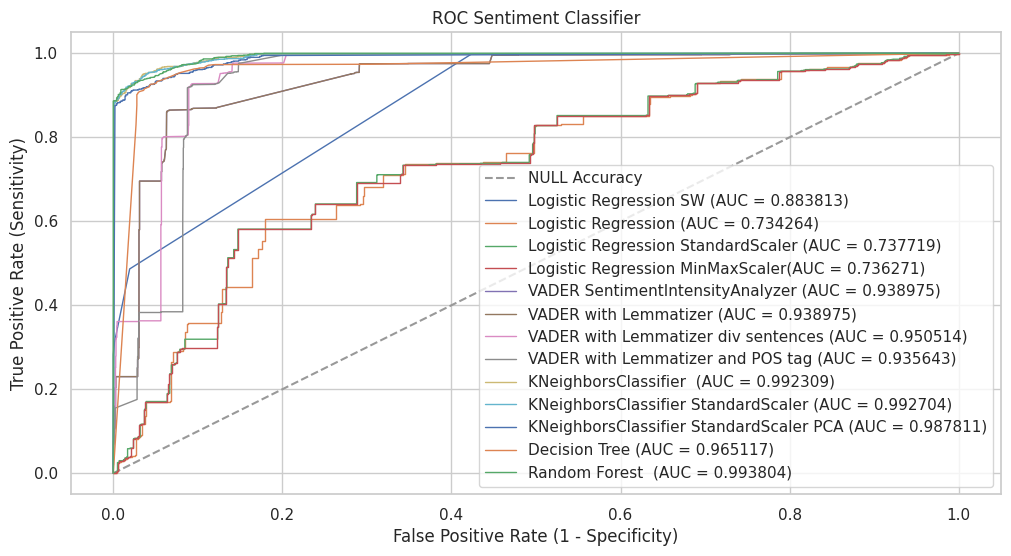

In [ ]:
sns.set(style='whitegrid', context='notebook')
plt.figure(figsize=(12, 6))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='NULL Accuracy')
plt.plot(fpr_sw, tpr_sw, lw=1, label='Logistic Regression SW (AUC = %0.6f)' % roc_auc_sw)
plt.plot(fpr_lr, tpr_lr, lw=1, label='Logistic Regression (AUC = %0.6f)' % roc_auc_lr)
plt.plot(fpr_lr_ss, tpr_lr_ss, lw=1, label='Logistic Regression StandardScaler (AUC = %0.6f)' % roc_auc_lr_ss)
plt.plot(fpr_lr_mm, tpr_lr_mm, lw=1, label='Logistic Regression MinMaxScaler(AUC = %0.6f)' % roc_auc_lr_mm)
plt.plot(fpr_vader, tpr_vader, lw=1, label='VADER SentimentIntensityAnalyzer (AUC = %0.6f)' % roc_auc_vader)
plt.plot(fpr_vader_lemmatizer, tpr_vader_lemmatizer, lw=1, label='VADER with Lemmatizer (AUC = %0.6f)' % roc_auc_vader_lemmatizer)
plt.plot(fpr_vader_lemma_div, tpr_vader_lemma_div, lw=1, label='VADER with Lemmatizer div sentences (AUC = %0.6f)' % roc_auc_vader_lemma_div)
plt.plot(fpr_vader_lemma2, tpr_vader_lemma2, lw=1, label='VADER with Lemmatizer and POS tag (AUC = %0.6f)' % roc_auc_vader_lemma2)
plt.plot(fpr_knn, tpr_knn, lw=1, label='KNeighborsClassifier  (AUC = %0.6f)' % roc_auc_knn)
plt.plot(fpr_knn_ss, tpr_knn_ss, lw=1, label='KNeighborsClassifier StandardScaler (AUC = %0.6f)' % roc_auc_knn_ss)
plt.plot(fpr_knn_ss_pca, tpr_knn_ss_pca, lw=1, label='KNeighborsClassifier StandardScaler PCA (AUC = %0.6f)' % roc_auc_knn_ss_pca)
plt.plot(fpr_decisiontree, tpr_decisiontree, lw=1, label='Decision Tree (AUC = %0.6f)' % roc_auc_decisiontree)
plt.plot(fpr_randomforest, tpr_randomforest, lw=1, label='Random Forest  (AUC = %0.6f)' % roc_auc_randomforest)
plt.title('ROC Sentiment Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

# **TRAIN - VALIDATION set split**

In [28]:
# Preprocessing parameters
vocab_size = 20000  # Max number of words in dict
max_length = 100    # Max length sequence

# Tokenizer
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_data_df.comment)

# Convert txt to sequence
X = tokenizer.texts_to_sequences(train_data_df.comment)
X = pad_sequences(X, maxlen=max_length)

y = train_data_df.sentiment.values

# Train, validation set split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# **CNN - Convolutional Neural Network**

In [57]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
    model.add(keras.layers.Conv1D(
        filters=hp.Int('filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size', values=[3, 5, 7]),
        activation='relu'))
    model.add(keras.layers.GlobalMaxPooling1D())
    model.add(keras.layers.Dense(units=hp.Int('units', min_value=10, max_value=100, step=10), activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined here based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='grid_search_cnn'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model_cnn = tuner.get_best_models(num_models=1)[0]
best_model_cnn.evaluate(X_test, y_test)

Trial 3 Complete [00h 00m 22s]
val_loss: 0.2888575792312622

Best val_loss So Far: 0.018854347988963127
Total elapsed time: 00h 01m 16s
74/74 [==============================] - 0s 3ms/step
ROC AUC Score: 0.999561305340436


In [58]:
y_pred_prob_cnn = best_model_cnn.predict(X_test).flatten()  # Get the probabilities
y_pred_cnn = (y_pred_prob_cnn > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc_cnn = metrics.roc_auc_score(y_test, y_pred_prob_cnn)
fpr_cnn, tpr_cnn, thresholds = metrics.roc_curve(y_test, y_pred_prob_cnn)
print("ROC AUC Score:", roc_auc_cnn)

74/74 [==============================] - 0s 3ms/step
ROC AUC Score: 0.999561305340436


In [30]:
add_model_metrics('CNN', y_test, y_pred_cnn, y_pred_prob_cnn, "selection")

In [31]:
# Save the entire model as a SavedModel.
best_model_cnn.save('models/CNN')

In [32]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
    model.add(keras.layers.Conv1D(
        filters=hp.Int('filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size', values=[3, 5, 7]),
        activation='relu'))
    model.add(keras.layers.GlobalMaxPooling1D())

    # Adding L1 and L2 regularization
    l1_value = hp.Choice('l1_reg', values=[1e-2, 1e-3, 1e-4])
    l2_value = hp.Choice('l2_reg', values=[1e-2, 1e-3, 1e-4])
    model.add(keras.layers.Dense(
        units=hp.Int('units', min_value=10, max_value=100, step=10),
        activation='relu',
        kernel_regularizer=keras.regularizers.l1_l2(l1=l1_value, l2=l2_value)))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='grid_search_cnn'
)

# Make sure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model_cnn_reg = tuner.get_best_models(num_models=1)[0]
results_cnn_reg = best_model_cnn_reg.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results_cnn_reg)

y_pred_prob_cnn_reg = best_model_cnn_reg.predict(X_test).flatten()  # Get the probabilities
y_pred_cnn_reg = (y_pred_prob_cnn_reg > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc_cnn_reg = metrics.roc_auc_score(y_test, y_pred_prob_cnn_reg)
fpr_cnn_reg, tpr_cnn_reg, thresholds = metrics.roc_curve(y_test, y_pred_prob_cnn_reg)
print("ROC AUC Score:", roc_auc_cnn_reg)

Trial 3 Complete [00h 00m 22s]
val_loss: 0.9300320744514465

Best val_loss So Far: 0.02939433790743351
Total elapsed time: 00h 00m 57s
74/74 [==============================] - 1s 5ms/step - loss: 0.0294 - auc: 0.9995
Test Loss, Test AUC: [0.02939433790743351, 0.9995020627975464]
74/74 [==============================] - 0s 4ms/step
ROC AUC Score: 0.9996918692272111


In [33]:
add_model_metrics('CNN_reg', y_test, y_pred_cnn_reg, y_pred_prob_cnn_reg, "selection")

In [34]:
# Save the entire model as a SavedModel.
best_model_cnn_reg.save('models/CNN_reg')

In [36]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
    model.add(keras.layers.Conv1D(
        filters=hp.Int('filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size', values=[3, 5, 7]),
        activation='relu'))
    model.add(keras.layers.Dropout(rate=hp.Float('dropout_conv', min_value=0.0, max_value=0.5, step=0.1)))  # Dropout after convolutional layer
    model.add(keras.layers.GlobalMaxPooling1D())
    model.add(keras.layers.Dense(
        units=hp.Int('units', min_value=10, max_value=100, step=10),
        activation='relu'))
    model.add(keras.layers.Dropout(rate=hp.Float('dropout_dense', min_value=0.0, max_value=0.5, step=0.1)))  # Dropout after Dense layer
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='grid_search_cnn'
)

tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model_cnn_dropout = tuner.get_best_models(num_models=1)[0]
results_cnn_dropout = best_model_cnn_dropout.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results_cnn_dropout)

y_pred_prob_cnn_dropout = best_model_cnn_dropout.predict(X_test).flatten()
y_pred_cnn_dropout = (y_pred_prob_cnn_dropout > 0.5).astype(int)

roc_auc_cnn_dropout = metrics.roc_auc_score(y_test, y_pred_prob_cnn_dropout)
fpr_cnn_cnn_dropout, tpr_cnn_dropout, thresholds = metrics.roc_curve(y_test, y_pred_prob_cnn_dropout)
print("ROC AUC Score:", roc_auc_cnn_dropout)


Trial 3 Complete [00h 00m 22s]
val_loss: 0.19350869953632355

Best val_loss So Far: 0.021696235984563828
Total elapsed time: 00h 00m 58s
74/74 [==============================] - 1s 3ms/step - loss: 0.0217 - auc: 0.9994
Test Loss, Test AUC: [0.021696235984563828, 0.9994304180145264]
74/74 [==============================] - 0s 3ms/step
ROC AUC Score: 0.9997172359252131


In [37]:
add_model_metrics('CNN_dropout', y_test, y_pred_cnn_dropout, y_pred_prob_cnn_dropout, "selection")

In [38]:
# Save the entire model as a SavedModel.
best_model_cnn_dropout.save('models/CNN_dropout')

In [39]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
    model.add(keras.layers.Conv1D(
        filters=hp.Int('filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size', values=[3, 5, 7]),
        activation='relu'))
    model.add(keras.layers.Dropout(rate=hp.Float('dropout_conv', min_value=0.0, max_value=0.5, step=0.1)))  # Dropout after convolution
    model.add(keras.layers.GlobalMaxPooling1D())
    model.add(keras.layers.Dense(
        units=hp.Int('units', min_value=10, max_value=100, step=10),
        activation='relu',
        kernel_regularizer=keras.regularizers.l1_l2(
            l1=hp.Choice('l1_reg', values=[1e-2, 1e-3, 1e-4]),
            l2=hp.Choice('l2_reg', values=[1e-2, 1e-3, 1e-4]))))
    model.add(keras.layers.Dropout(rate=hp.Float('dropout_dense', min_value=0.0, max_value=0.5, step=0.1)))  # Dropout after dense layer
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='grid_search_cnn'
)

tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model_cnn_reg_dropout = tuner.get_best_models(num_models=1)[0]
results_cnn_reg_dropout = best_model_cnn_reg_dropout.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results_cnn_reg_dropout)

y_pred_prob_cnn_reg_dropout = best_model_cnn_reg_dropout.predict(X_test).flatten()
y_pred_cnn_reg_dropout = (y_pred_prob_cnn_reg_dropout > 0.5).astype(int)

roc_auc_cnn_reg_dropout = metrics.roc_auc_score(y_test, y_pred_prob_cnn_reg_dropout)
fpr_cnn_cnn_reg_dropout, tpr_cnn_reg_dropout, thresholds = metrics.roc_curve(y_test, y_pred_prob_cnn_reg_dropout)
print("ROC AUC Score:", roc_auc_cnn_reg_dropout)

Trial 3 Complete [00h 00m 13s]
val_loss: 0.8023399710655212

Best val_loss So Far: 0.03277603164315224
Total elapsed time: 00h 00m 40s
74/74 [==============================] - 1s 3ms/step - loss: 0.0328 - auc: 0.9995
Test Loss, Test AUC: [0.03277603164315224, 0.999514639377594]
74/74 [==============================] - 0s 3ms/step
ROC AUC Score: 0.999415819866601


In [40]:
add_model_metrics('CNN_reg_dropout', y_test, y_pred_cnn_reg_dropout, y_pred_prob_cnn_reg_dropout, "selection")

In [41]:
# Save the entire model as a SavedModel.
best_model_cnn_reg_dropout.save('models/CNN_reg_dropout')

In [42]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    # Embedding layer that turns positive integers (indexes) into dense vectors
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
    # Convolutional layer that will learn local patterns
    model.add(keras.layers.Conv1D(
        filters=hp.Int('filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size', values=[3, 5, 7]),
        activation='relu'))
    # Gaussian Noise added as a regularization method
    model.add(keras.layers.GaussianNoise(hp.Float('noise_conv', min_value=0.0, max_value=0.5, step=0.1)))
    # Global Max Pooling layer to reduce dimensionality and extract important features
    model.add(keras.layers.GlobalMaxPooling1D())
    # Dense layer to perform classification
    model.add(keras.layers.Dense(
        units=hp.Int('units', min_value=10, max_value=100, step=10),
        activation='relu'))
    # Another Gaussian Noise layer after Dense layer for additional regularization
    model.add(keras.layers.GaussianNoise(hp.Float('noise_dense', min_value=0.0, max_value=0.5, step=0.1)))
    # Output layer with sigmoid activation for binary classification
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Compiling the model with Adam optimizer and binary crossentropy as the loss function
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Setting up a GridSearch tuner from Keras Tuner to find the best hyperparameters
tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='grid_search_cnn_rand'
)

# Running the hyperparameter tuning process
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Fetching the best model and evaluating it on the test set
best_model_cnn_reg_noise = tuner.get_best_models(num_models=1)[0]
results_cnn_reg_noise = best_model_cnn_reg_noise.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results_cnn_reg_noise)

Trial 3 Complete [00h 00m 15s]
val_loss: 0.2124587744474411

Best val_loss So Far: 0.020562103018164635
Total elapsed time: 00h 00m 52s
74/74 [==============================] - 1s 3ms/step - loss: 0.0206 - auc: 0.9994
Test Loss, Test AUC: [0.020562103018164635, 0.9994489550590515]


In [43]:
# Making predictions with the best model
y_pred_prob_cnn_reg_noise = best_model_cnn_reg_noise.predict(X_test).flatten()  # Get probabilities
y_pred_cnn_reg_noise = (y_pred_prob_cnn_reg_noise > 0.5).astype(int)  # Convert probabilities to binary class labels

# Calculating the ROC AUC score to evaluate the classifier's performance
roc_auc_cnn_reg_noise = metrics.roc_auc_score(y_test, y_pred_prob_cnn_reg_noise)
fpr_cnn_reg_noise, tpr_cnn_reg_noise, thresholds = metrics.roc_curve(y_test, y_pred_prob_cnn_reg_noise)
print("ROC AUC Score:", roc_auc_cnn_reg_noise)

74/74 [==============================] - 0s 3ms/step
ROC AUC Score: 0.99966426429115


In [44]:
add_model_metrics('CNN_reg_noise', y_test, y_pred_cnn_reg_noise, y_pred_prob_cnn_reg_noise, "selection")

In [45]:
# Save the entire model as a SavedModel.
best_model_cnn_reg_noise.save('models/CNN_reg_noise')

In [46]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    # Embedding layer that turns positive integers (indexes) into dense vectors
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
    # Convolutional layer that will learn local patterns
    model.add(keras.layers.Conv1D(
        filters=hp.Int('filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size', values=[3, 5, 7]),
        activation='relu'))
    # Global Max Pooling layer to reduce dimensionality and extract important features
    model.add(keras.layers.GlobalMaxPooling1D())
    # Dense layer to perform classification
    model.add(keras.layers.Dense(
        units=hp.Int('units', min_value=10, max_value=100, step=10),
        activation='relu'))
    # Output layer with sigmoid activation for binary classification
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Compiling the model with Adam optimizer and binary crossentropy as the loss function
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Setting up a GridSearch tuner from Keras Tuner to find the best hyperparameters
tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='grid_search_cnn_no_reg'
)

# Running the hyperparameter tuning process
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Fetching the best model and evaluating it on the test set
best_model_cnn_noise = tuner.get_best_models(num_models=1)[0]
results_cnn_noise = best_model_cnn_noise.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results_cnn_noise)

Trial 3 Complete [00h 00m 22s]
val_loss: 0.18673597276210785

Best val_loss So Far: 0.016828924417495728
Total elapsed time: 00h 01m 06s
74/74 [==============================] - 1s 6ms/step - loss: 0.0168 - auc: 0.9995
Test Loss, Test AUC: [0.016828924417495728, 0.9995023012161255]


In [48]:
# Making predictions with the best model
y_pred_prob_cnn_noise = best_model_cnn_noise.predict(X_test).flatten()  # Get probabilities
y_pred_cnn_noise = (y_pred_prob_cnn_noise > 0.5).astype(int)  # Convert probabilities to binary class labels

# Calculating the ROC AUC score to evaluate the classifier's performance
roc_auc_cnn_noise = metrics.roc_auc_score(y_test, y_pred_prob_cnn_noise)
fpr_cnn_noise, tpr_cnn_noise, thresholds = metrics.roc_curve(y_test, y_pred_prob_cnn_noise)
print("ROC AUC Score:", roc_auc_cnn_noise)

74/74 [==============================] - 0s 3ms/step
ROC AUC Score: 0.999817210558515


In [49]:
add_model_metrics('CNN_noise', y_test, y_pred_cnn_noise, y_pred_prob_cnn_noise, "selection")

In [50]:
# Save the entire model as a SavedModel.
best_model_cnn_noise.save('models/CNN_noise')

In [51]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
    model.add(keras.layers.Conv1D(
        filters=hp.Int('filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size', values=[3, 5, 7]),
        activation='relu'))

    # Let the tuner choose between GaussianNoise and Dropout for regularization after Conv1D
    if hp.Choice('reg_conv_type', ['gaussian_noise', 'dropout']) == 'gaussian_noise':
        model.add(keras.layers.GaussianNoise(hp.Float('noise_conv', min_value=0.0, max_value=0.5, step=0.1)))
    else:
        model.add(keras.layers.Dropout(hp.Float('dropout_conv', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(keras.layers.GlobalMaxPooling1D())
    model.add(keras.layers.Dense(
        units=hp.Int('units', min_value=10, max_value=100, step=10),
        activation='relu'))

    # Let the tuner choose between GaussianNoise and Dropout for regularization after Dense
    if hp.Choice('reg_dense_type', ['gaussian_noise', 'dropout']) == 'gaussian_noise':
        model.add(keras.layers.GaussianNoise(hp.Float('noise_dense', min_value=0.0, max_value=0.5, step=0.1)))
    else:
        model.add(keras.layers.Dropout(hp.Float('dropout_dense', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Selecting an optimizer
    optimizer_choice = hp.Choice('optimizer', values=['sgd', 'adam', 'rmsprop', 'adagrad', 'momentum'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    if optimizer_choice == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=hp.Float('momentum', min_value=0.0, max_value=0.9))
    elif optimizer_choice == 'momentum':
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=hp.Float('momentum', min_value=0.0, max_value=0.9))
    else:
        optimizer = keras.optimizers.get(optimizer_choice)(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Setup Keras Tuner
tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",
    max_trials=10,  # Increased trials to test combinations
    overwrite=True,
    executions_per_trial=2,
    directory='my_dir',
    project_name='grid_search_reg_methods'
)

# Running the tuner
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Getting the best model
best_model_cnn_noise_dropout_optimizer = tuner.get_best_models(num_models=1)[0]
results_cnn_noise_dropout_optimizer = best_model_cnn_noise_dropout_optimizer.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results_cnn_noise_dropout_optimizer)

Trial 10 Complete [00h 00m 24s]
val_loss: 0.684765487909317

Best val_loss So Far: 0.6833639144897461
Total elapsed time: 00h 05m 51s
74/74 [==============================] - 1s 3ms/step - loss: 0.6823 - auc: 0.6443
Test Loss, Test AUC: [0.6823152899742126, 0.6443082094192505]


In [52]:
# Prediction and Evaluation
y_pred_prob_cnn_noise_dropout_optimizer = best_model_cnn_noise_dropout_optimizer.predict(X_test).flatten()  # Get probabilities
y_pred_cnn_noise_dropout_optimizer = (y_pred_prob_cnn_noise_dropout_optimizer > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc_cnn_noise_dropout_optimizer = metrics.roc_auc_score(y_test, y_pred_prob_cnn_noise_dropout_optimizer)
fpr_cnn_noise_dropout_optimizer, tpr_cnn_noise_dropout_optimizer, thresholds = metrics.roc_curve(y_test, y_pred_prob_cnn_noise_dropout_optimizer)
print("ROC AUC Score:", roc_auc_cnn_noise_dropout_optimizer)

74/74 [==============================] - 0s 3ms/step
ROC AUC Score: 0.6657445125863586


In [53]:
add_model_metrics('CNN_noise_dropout_optimizer', y_test, y_pred_cnn_noise_dropout_optimizer,
                  y_pred_prob_cnn_noise_dropout_optimizer, "selection")

In [54]:
# Save the entire model as a SavedModel.
best_model_cnn_noise_dropout_optimizer.save('models/CNN_noise_dropout_optimizer')

In [55]:
#Choose the best CNN model
select_best_model()

Model name:  CNN -> SCORE:  0.6632606317485432
Model name:  CNN_noise_dropout_optimizer -> SCORE:  0.49700027694071475
Model name:  CNN_reg -> SCORE:  0.6647678962024621
Model name:  CNN_dropout -> SCORE:  0.6636165128980988
Model name:  CNN_reg_dropout -> SCORE:  0.6643721384553954
Model name:  CNN_reg_noise -> SCORE:  0.6631009069759938
Model name:  CNN_noise -> SCORE:  0.6637973720553583
Selected best model: CNN_reg
Best model metrics:
auc: 0.9996918692272111
precision: 0.9955089820359282
recall: 0.9962546816479401
f1_score: 0.9958816922500936
roc_auc: 0.9951392930152051
pr_auc: 0.9997968668596486
log_loss: 0.01635713307236769


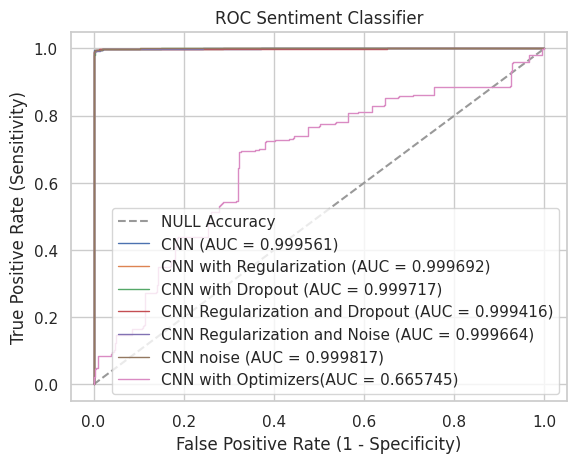

In [59]:
sns.set(style='whitegrid', context='notebook')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='NULL Accuracy')
plt.plot(fpr_tf, tpr_tf, lw=1, label='Logistic Regression TF (AUC = %0.6f)' % roc_auc_tf)
plt.plot(fpr_tfidf, tpr_tfidf, lw=1, label='Logistic Regression TF-IDF (AUC = %0.6f)' % roc_auc_tfidf)
plt.plot(fpr_vader, tpr_vader, lw=1, label='VADER SentimentIntensityAnalyzer (AUC = %0.6f)' % roc_auc_vader)
plt.plot(fpr_lemmatizer, tpr_lemmatizer, lw=1, label='VADER with Lemmatizer (AUC = %0.6f)' % roc_auc_lemmatizer)
plt.plot(fpr_lem_div, tpr_lem_div, lw=1, label='VADER with Lemmatizer div senteces (AUC = %0.6f)' % roc_auc_lem_div)
plt.plot(fpr_lem2, tpr_lem2, lw=1, label='VADER Lemmatize text with POS (AUC = %0.6f)' % roc_auc_lem2)
plt.plot(fpr_tfidf_knn, tpr_tfidf_knn, lw=1, label='KNN TF-IDF (AUC = %0.6f)' % roc_auc_tfidf_knn)
plt.plot(fpr_tfidf_dt, tpr_tfidf_dt, lw=1, label='Decision Tree TF-IDF (AUC = %0.6f)' % roc_auc_tfidf_dt)
plt.plot(fpr_cnn, tpr_cnn, lw=1, label='CNN (AUC = %0.6f)' % roc_auc_cnn)
plt.plot(fpr_cnn_reg, tpr_cnn_reg, lw=1, label='CNN with Regularization (AUC = %0.6f)' % roc_auc_cnn_reg)
plt.plot(fpr_cnn_cnn_dropout, tpr_cnn_dropout, lw=1, label='CNN with Dropout (AUC = %0.6f)' % roc_auc_cnn_dropout)
plt.plot(fpr_cnn_cnn_reg_dropout, tpr_cnn_reg_dropout, lw=1, label='CNN Regularization and Dropout (AUC = %0.6f)' % roc_auc_cnn_reg_dropout)
plt.plot(fpr_cnn_reg_noise, tpr_cnn_reg_noise, lw=1, label='CNN Regularization and Noise (AUC = %0.6f)' % roc_auc_cnn_reg_noise)
plt.plot(fpr_cnn_noise, tpr_cnn_noise, lw=1, label='CNN noise (AUC = %0.6f)' % roc_auc_cnn_noise)
plt.plot(fpr_cnn_noise_dropout_optimizer, tpr_cnn_noise_dropout_optimizer, lw=1, label='CNN with Optimizers(AUC = %0.6f)' % roc_auc_cnn_noise_dropout_optimizer)
plt.title('ROC Sentiment Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

# **RNN - Recurrent Neural Network**

In [61]:
#Recurrent Neural Network (RNN)

model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
model_rnn.add(SimpleRNN(units=50))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
model_rnn.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

y_pred_prob_rnn = model_rnn.predict(X_test).flatten()
y_pred_rnn = (y_pred_prob_rnn > 0.5).astype(int)
fpr_rnn, tpr_rnn, thresholds = metrics.roc_curve(y_test, y_pred_prob_rnn)
roc_auc_rnn = metrics.auc(fpr_rnn, tpr_rnn)

print(f"ROC AUC: {roc_auc_rnn}")

Epoch 1/5
149/149 [==============================] - 8s 45ms/step - loss: 0.2810 - auc: 0.9585 - val_loss: 0.1449 - val_auc: 0.9891
Epoch 2/5
149/149 [==============================] - 5s 32ms/step - loss: 0.0718 - auc: 0.9976 - val_loss: 0.1080 - val_auc: 0.9931
Epoch 3/5
149/149 [==============================] - 7s 44ms/step - loss: 0.0241 - auc: 0.9998 - val_loss: 0.0971 - val_auc: 0.9942
Epoch 4/5
149/149 [==============================] - 8s 56ms/step - loss: 0.0090 - auc: 1.0000 - val_loss: 0.0933 - val_auc: 0.9949
Epoch 5/5
74/74 [==============================] - 1s 11ms/step
ROC AUC: 0.9960562245400422


In [62]:
add_model_metrics('RNN', y_test, y_pred_rnn, y_pred_prob_rnn, "selection")

In [63]:
# Save the entire model as a SavedModel.
model_rnn.save('models/RNN')

In [64]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a LSTM layer
    model.add(keras.layers.LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=256, step=32),
        return_sequences=False,  # set to True if stacking LSTM layers, else False
        dropout=hp.Float('lstm_dropout', min_value=0.0, max_value=0.5, step=0.1),  # dropout for input
        recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.0, max_value=0.5, step=0.1)  # dropout for recurrent state
    ))

    model.add(keras.layers.Dense(
        units=hp.Int('dense_units', min_value=10, max_value=100, step=10),
        activation='relu'))
    model.add(keras.layers.Dropout(rate=hp.Float('dense_dropout', min_value=0.0, max_value=0.5, step=0.1)))  # Dropout after dense layer

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='rnn_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model_rnn_dropout = tuner.get_best_models(num_models=1)[0]
results_rnn_dropout = best_model_rnn_dropout.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results_rnn_dropout)

y_pred_prob_rnn_dropout = best_model_rnn_dropout.predict(X_test).flatten()  # Get the probabilities
y_pred_rnn_dropout = (y_pred_prob_rnn_dropout > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc_rnn_dropout = metrics.roc_auc_score(y_test, y_pred_prob_rnn_dropout)
fpr_rnn_dropout, tpr_rnn_dropout, thresholds = metrics.roc_curve(y_test, y_pred_prob_rnn_dropout)
print("ROC AUC Score:", roc_auc_rnn_dropout)


Trial 3 Complete [00h 01m 26s]
val_loss: 0.26932293176651

Best val_loss So Far: 0.043734241276979446
Total elapsed time: 00h 03m 19s
74/74 [==============================] - 2s 13ms/step - loss: 0.0437 - auc: 0.9989
Test Loss, Test AUC: [0.043734241276979446, 0.9989208579063416]
74/74 [==============================] - 1s 12ms/step
ROC AUC Score: 0.9990838145545161


In [65]:
add_model_metrics('RNN_dropout', y_test, y_pred_rnn_dropout, y_pred_prob_rnn_dropout, "selection")

In [66]:
# Save the entire model as a SavedModel.
best_model_rnn_dropout.save('models/RNN_dropout')

In [67]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a LSTM layer with dropout
    model.add(keras.layers.LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=256, step=32),
        return_sequences=False,  # set to True if stacking LSTM layers, else False
        dropout=hp.Float('lstm_dropout', min_value=0.0, max_value=0.5, step=0.1),  # dropout for input
        recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.0, max_value=0.5, step=0.1)  # dropout for recurrent state
    ))

    # Adding a Dense layer with L1 and L2 regularization
    model.add(keras.layers.Dense(
        units=hp.Int('dense_units', min_value=10, max_value=100, step=10),
        activation='relu',
        kernel_regularizer=keras.regularizers.l1_l2(
            l1=hp.Float('l1_reg', min_value=1e-5, max_value=1e-2, sampling='log'),
            l2=hp.Float('l2_reg', min_value=1e-5, max_value=1e-2, sampling='log')
        )))

    model.add(keras.layers.Dropout(rate=hp.Float('dense_dropout', min_value=0.0, max_value=0.5, step=0.1)))  # Dropout after dense layer

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='rnn_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model_rnn_reg_dropout = tuner.get_best_models(num_models=1)[0]
results_rnn_reg_dropout = best_model_rnn_reg_dropout.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results_rnn_reg_dropout)

y_pred_prob_rnn_reg_dropout = best_model_rnn_reg_dropout.predict(X_test).flatten()  # Get the probabilities
y_pred_rnn_reg_dropout = (y_pred_prob_rnn_reg_dropout > 0.5).astype(int)  # Convert probabilities to binary class labels

fpr_rnn_reg_dropout, tpr_rnn_reg_dropout, thresholds = metrics.roc_curve(y_test, y_pred_prob_rnn_reg_dropout)
roc_auc_rnn_reg_dropout = metrics.roc_auc_score(y_test, y_pred_prob_rnn_reg_dropout)
print("ROC AUC Score:", roc_auc_rnn_reg_dropout)


Trial 3 Complete [00h 01m 36s]
val_loss: 0.1692913919687271

Best val_loss So Far: 0.04781753942370415
Total elapsed time: 00h 04m 34s
74/74 [==============================] - 3s 20ms/step - loss: 0.0478 - auc: 0.9955
Test Loss, Test AUC: [0.04781753942370415, 0.9954701662063599]
74/74 [==============================] - 2s 19ms/step
ROC AUC Score: 0.99811988003044


In [68]:
add_model_metrics('RNN_reg_dropout', y_test, y_pred_rnn_reg_dropout, y_pred_prob_rnn_reg_dropout, "selection")

In [69]:
# Save the entire model as a SavedModel.
best_model_rnn_reg_dropout.save('models/RNN_reg_dropout')

In [70]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a LSTM layer
    model.add(keras.layers.LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=256, step=32),
        return_sequences=False  # set to True if stacking LSTM layers, else False
    ))

    # Adding a Dense layer with L1 and L2 regularization
    model.add(keras.layers.Dense(
        units=hp.Int('dense_units', min_value=10, max_value=100, step=10),
        activation='relu',
        kernel_regularizer=keras.regularizers.l1_l2(
            l1=hp.Float('l1_reg', min_value=1e-5, max_value=1e-2, sampling='log'),
            l2=hp.Float('l2_reg', min_value=1e-5, max_value=1e-2, sampling='log')
        )))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='rnn_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model_rnn_reg = tuner.get_best_models(num_models=1)[0]
results_rnn_reg = best_model_rnn_reg.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results_rnn_reg)

y_pred_prob_rnn_reg = best_model_rnn_reg.predict(X_test).flatten()  # Get the probabilities
y_pred_rnn_reg = (y_pred_prob_rnn_reg > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc_rnn_reg = metrics.roc_auc_score(y_test, y_pred_prob_rnn_reg)
fpr_rnn_reg, tpr_rnn_reg, thresholds = metrics.roc_curve(y_test, y_pred_prob_rnn_reg)
print("ROC AUC Score:", roc_auc_rnn_reg)

Trial 3 Complete [00h 01m 29s]
val_loss: 0.12506619095802307

Best val_loss So Far: 0.037484657019376755
Total elapsed time: 00h 05m 20s
74/74 [==============================] - 2s 13ms/step - loss: 0.0375 - auc: 0.9980
Test Loss, Test AUC: [0.037484657019376755, 0.9979855418205261]
74/74 [==============================] - 1s 12ms/step
ROC AUC Score: 0.998475759881821


In [71]:
add_model_metrics('RNN_reg', y_test, y_pred_rnn_reg, y_pred_prob_rnn_reg, "selection")

In [72]:
# Save the entire model as a SavedModel.
best_model_rnn_reg.save('models/RNN_reg')

In [73]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a simple LSTM layer
    model.add(keras.layers.LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=256, step=32),
        return_sequences=False  # Set to True if stacking LSTM layers, else False
    ))

    # Adding a Dense layer
    model.add(keras.layers.Dense(
        units=hp.Int('dense_units', min_value=10, max_value=100, step=10),
        activation='relu'
    ))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='rnn_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model_rnn_gs = tuner.get_best_models(num_models=1)[0]
results_rnn_gs = best_model_rnn_gs.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results_rnn_gs)

Trial 3 Complete [00h 01m 26s]
val_loss: 0.3569053113460541

Best val_loss So Far: 0.03802556172013283
Total elapsed time: 00h 03m 51s
74/74 [==============================] - 2s 13ms/step - loss: 0.0380 - auc: 0.9984
Test Loss, Test AUC: [0.03802556172013283, 0.9984459280967712]


In [74]:
y_pred_prob_rnn_gs = best_model_rnn_gs.predict(X_test).flatten()  # Get the probabilities
y_pred_rnn_gs = (y_pred_prob_rnn_gs > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc_rnn_gs = metrics.roc_auc_score(y_test, y_pred_prob_rnn_gs)
fpr_rnn_gs, tpr_rnn_gs, thresholds = metrics.roc_curve(y_test, y_pred_prob_rnn_gs)
print("ROC AUC Score:", roc_auc_rnn_gs)

74/74 [==============================] - 1s 12ms/step
ROC AUC Score: 0.999077099840339


In [75]:
add_model_metrics('RNN_gs', y_test, y_pred_rnn_gs, y_pred_prob_rnn_gs, "selection")

In [76]:
# Save the entire model as a SavedModel.
best_model_rnn_gs.save('models/RNN_gs')

In [79]:
from tensorflow import keras
import keras_tuner as kt
from sklearn import metrics

def build_model_rnn_noise_dropout_optimizer(hp, vocab_size, max_length):
    model = keras.Sequential(name="model_rnn_noise_dropout_optimizer")
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length, name="embedding_rnn_noise_dropout_optimizer"))

    # Adding a LSTM layer with dynamic unit selection
    model.add(keras.layers.LSTM(
        units=hp.Int('lstm_units_rnn_noise_dropout_optimizer', min_value=32, max_value=256, step=32),
        return_sequences=False,  # Set to True if stacking LSTM layers, else False
        name="lstm_rnn_noise_dropout_optimizer"
    ))

    # Conditional regularization choice
    reg_type = hp.Choice('reg_type_rnn_noise_dropout_optimizer', ['gaussian_noise', 'dropout'])
    if reg_type == 'gaussian_noise':
        model.add(keras.layers.GaussianNoise(
            hp.Float('noise_level_rnn_noise_dropout_optimizer', min_value=0.0, max_value=0.5, step=0.1),
            name="gaussian_noise_rnn_noise_dropout_optimizer"
        ))
    else:
        model.add(keras.layers.Dropout(
            hp.Float('dropout_rate_rnn_noise_dropout_optimizer', min_value=0.0, max_value=0.5, step=0.1),
            name="dropout_rnn_noise_dropout_optimizer"
        ))

    # Dense layer with L1 and L2 regularization
    model.add(keras.layers.Dense(
        units=hp.Int('dense_units_rnn_noise_dropout_optimizer', min_value=10, max_value=100, step=10),
        activation='relu',
        kernel_regularizer=keras.regularizers.l1_l2(
            l1=hp.Float('l1_reg_rnn_noise_dropout_optimizer', min_value=1e-5, max_value=1e-2, sampling='log'),
            l2=hp.Float('l2_reg_rnn_noise_dropout_optimizer', min_value=1e-5, max_value=1e-2, sampling='log')
        ),
        name="dense_rnn_noise_dropout_optimizer"
    ))

    model.add(keras.layers.Dense(1, activation='sigmoid', name="output_rnn_noise_dropout_optimizer"))

    # Optimizer selection
    optimizer_choice = hp.Choice('optimizer_rnn_noise_dropout_optimizer', ['adam', 'sgd', 'rmsprop', 'adagrad'])
    learning_rate = hp.Float('learning_rate_rnn_noise_dropout_optimizer', min_value=1e-4, max_value=1e-2, sampling='log')
    if optimizer_choice == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate, name="sgd_rnn_noise_dropout_optimizer")
    else:
        optimizer = keras.optimizers.get(optimizer_choice)(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['AUC'],
        name="compile_rnn_noise_dropout_optimizer"
    )
    return model

vocab_size = 10000  # Example value
max_length = 100    # Example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model_rnn_noise_dropout_optimizer(hp, vocab_size, max_length),
    objective="val_loss",
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='rnn_search_with_reg_optimizer'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model_rnn_noise_dropout_optimizer = tuner.get_best_models(num_models=1)[0]
results_rnn_noise_dropout_optimizer = best_model_rnn_noise_dropout_optimizer.evaluate(X_test, y_test)
print("Test Loss, Test AUC_rnn_noise_dropout_optimizer:", results_rnn_noise_dropout_optimizer)

TypeError: Invalid keyword argument(s) in `compile()`: ({'name'},). Valid keyword arguments include "cloning", "experimental_run_tf_function", "distribute", "target_tensors", or "sample_weight_mode".

In [81]:
from tensorflow import keras
import keras_tuner as kt
from sklearn import metrics

def build_model_rnn_noise_dropout_optimizer(hp, vocab_size, max_length):
    model = keras.Sequential(name="model_rnn_noise_dropout_optimizer")
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length, name="embedding_rnn_noise_dropout_optimizer"))

    # Adding a LSTM layer with dynamic unit selection
    model.add(keras.layers.LSTM(
        units=hp.Int('lstm_units_rnn_noise_dropout_optimizer', min_value=32, max_value=256, step=32),
        return_sequences=False,  # Set to True if stacking LSTM layers, else False
        name="lstm_rnn_noise_dropout_optimizer"
    ))

    # Conditional regularization choice
    reg_type = hp.Choice('reg_type_rnn_noise_dropout_optimizer', ['gaussian_noise', 'dropout'])
    if reg_type == 'gaussian_noise':
        model.add(keras.layers.GaussianNoise(
            hp.Float('noise_level_rnn_noise_dropout_optimizer', min_value=0.0, max_value=0.5, step=0.1),
            name="gaussian_noise_rnn_noise_dropout_optimizer"
        ))
    else:
        model.add(keras.layers.Dropout(
            hp.Float('dropout_rate_rnn_noise_dropout_optimizer', min_value=0.0, max_value=0.5, step=0.1),
            name="dropout_rnn_noise_dropout_optimizer"
        ))

    # Dense layer with L1 and L2 regularization
    model.add(keras.layers.Dense(
        units=hp.Int('dense_units_rnn_noise_dropout_optimizer', min_value=10, max_value=100, step=10),
        activation='relu',
        kernel_regularizer=keras.regularizers.l1_l2(
            l1=hp.Float('l1_reg_rnn_noise_dropout_optimizer', min_value=1e-5, max_value=1e-2, sampling='log'),
            l2=hp.Float('l2_reg_rnn_noise_dropout_optimizer', min_value=1e-5, max_value=1e-2, sampling='log')
        ),
        name="dense_rnn_noise_dropout_optimizer"
    ))

    model.add(keras.layers.Dense(1, activation='sigmoid', name="output_rnn_noise_dropout_optimizer"))

    # Optimizer selection
    optimizer_choice = hp.Choice('optimizer_rnn_noise_dropout_optimizer', ['adam', 'sgd', 'rmsprop', 'adagrad'])
    learning_rate = hp.Float('learning_rate_rnn_noise_dropout_optimizer', min_value=1e-4, max_value=1e-2, sampling='log')
    if optimizer_choice == 'sgd':
      optimizer = keras.optimizers.SGD(learning_rate=learning_rate, name="sgd_rnn_noise_dropout_optimizer")
    else:
      # Properly instantiate the optimizer with the specified learning rate
      optimizer = keras.optimizers.get({
          'class_name': optimizer_choice,
          'config': {'learning_rate': learning_rate}
          })

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['AUC']
    )
    return model

vocab_size = 10000  # Example value
max_length = 100    # Example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model_rnn_noise_dropout_optimizer(hp, vocab_size, max_length),
    objective="val_loss",
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='rnn_search_with_reg_optimizer'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model_rnn_noise_dropout_optimizer = tuner.get_best_models(num_models=1)[0]
results_rnn_noise_dropout_optimizer = best_model_rnn_noise_dropout_optimizer.evaluate(X_test, y_test)
print("Test Loss, Test AUC_rnn_noise_dropout_optimizer:", results_rnn_noise_dropout_optimizer)

Trial 3 Complete [00h 01m 08s]
val_loss: 0.05009050667285919

Best val_loss So Far: 0.04601674899458885
Total elapsed time: 00h 02m 47s
74/74 [==============================] - 3s 14ms/step - loss: 0.0460 - auc: 0.9979
Test Loss, Test AUC_rnn_noise_dropout_optimizer: [0.04601674899458885, 0.9979304075241089]


In [82]:
y_pred_prob_rnn_noise_dropout_optimizer = best_model_rnn_noise_dropout_optimizer.predict(X_test).flatten()  # Get the probabilities
y_pred_rnn_noise_dropout_optimizer = (y_pred_prob_rnn_noise_dropout_optimizer > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc_rnn_noise_dropout_optimizer = metrics.roc_auc_score(y_test, y_pred_prob_rnn_noise_dropout_optimizer)
fpr_rnn_noise_dropout_optimizer, tpr_rnn_noise_dropout_optimizer, thresholds = metrics.roc_curve(y_test, y_pred_prob_rnn_noise_dropout_optimizer)
print("ROC AUC Score_rnn_noise_dropout_optimizer:", roc_auc_rnn_noise_dropout_optimizer)

74/74 [==============================] - 1s 12ms/step
ROC AUC Score_rnn_noise_dropout_optimizer: 0.998707790560604


In [83]:
add_model_metrics('RNN_noise_dropout_optimizer', y_test,
                  y_pred_rnn_noise_dropout_optimizer, y_pred_prob_rnn_noise_dropout_optimizer, "selection")

In [84]:
# Save the entire model as a SavedModel.
best_model_rnn_noise_dropout_optimizer.save('models/RNN_noise_dropout_optimizer')

In [85]:
#Choose the best RNN model
select_best_model()

Model name:  RNN -> SCORE:  0.654650609254645
Model name:  RNN_dropout -> SCORE:  0.6611326486564915
Model name:  RNN_reg_dropout -> SCORE:  0.6629256575094692
Model name:  RNN_reg -> SCORE:  0.6616849541536615
Model name:  RNN_gs -> SCORE:  0.6611608925702621
Model name:  RNN_noise_dropout_optimizer -> SCORE:  0.6607199168370216
Selected best model: RNN_reg_dropout
Best model metrics:
auc: 0.99811988003044
precision: 0.9910380881254668
recall: 0.9940074906367041
f1_score: 0.9925205684367988
roc_auc: 0.9910276497008221
pr_auc: 0.9978017963828099
log_loss: 0.04699159902816416


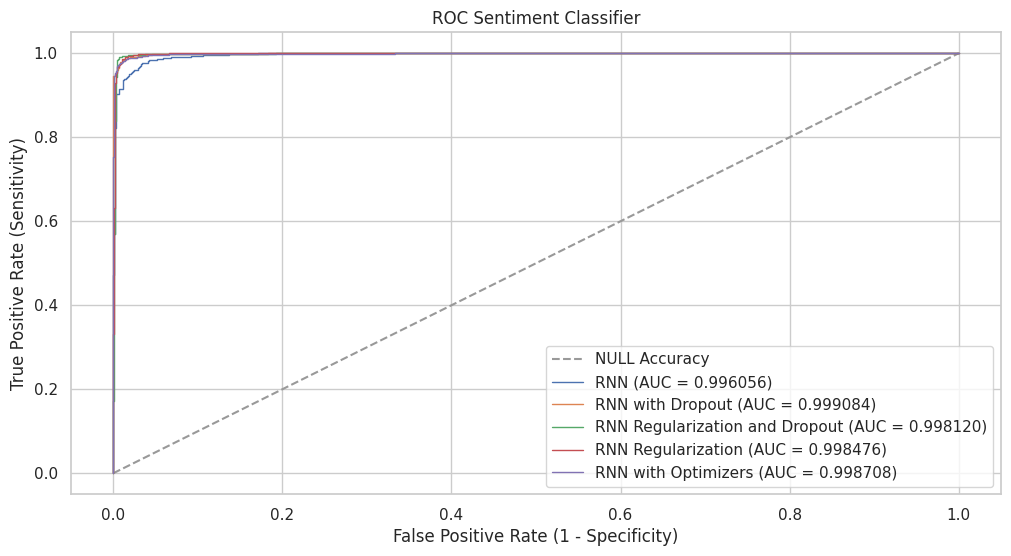

In [116]:
sns.set(style='whitegrid', context='notebook')
plt.figure(figsize=(12, 6))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='NULL Accuracy')
# plt.plot(fpr_tf, tpr_tf, lw=1, label='Logistic Regression TF (AUC = %0.6f)' % roc_auc_tf)
# plt.plot(fpr_tfidf, tpr_tfidf, lw=1, label='Logistic Regression TF-IDF (AUC = %0.6f)' % roc_auc_tfidf)
# plt.plot(fpr_vader, tpr_vader, lw=1, label='VADER SentimentIntensityAnalyzer (AUC = %0.6f)' % roc_auc_vader)
# plt.plot(fpr_lemmatizer, tpr_lemmatizer, lw=1, label='VADER with Lemmatizer (AUC = %0.6f)' % roc_auc_lemmatizer)
# plt.plot(fpr_lem_div, tpr_lem_div, lw=1, label='VADER with Lemmatizer div senteces (AUC = %0.6f)' % roc_auc_lem_div)
# plt.plot(fpr_lem2, tpr_lem2, lw=1, label='VADER Lemmatize text with POS (AUC = %0.6f)' % roc_auc_lem2)
# plt.plot(fpr_tfidf_knn, tpr_tfidf_knn, lw=1, label='KNN TF-IDF (AUC = %0.6f)' % roc_auc_tfidf_knn)
# plt.plot(fpr_tfidf_dt, tpr_tfidf_dt, lw=1, label='Decision Tree TF-IDF (AUC = %0.6f)' % roc_auc_tfidf_dt)
# plt.plot(fpr_cnn, tpr_cnn, lw=1, label='CNN (AUC = %0.6f)' % roc_auc_cnn)
# plt.plot(fpr_cnn_reg, tpr_cnn_reg, lw=1, label='CNN with Regularization (AUC = %0.6f)' % roc_auc_cnn_reg)
# plt.plot(fpr_cnn_cnn_dropout, tpr_cnn_dropout, lw=1, label='CNN with Dropout (AUC = %0.6f)' % roc_auc_cnn_dropout)
# plt.plot(fpr_cnn_cnn_reg_dropout, tpr_cnn_reg_dropout, lw=1, label='CNN Regularization and Dropout (AUC = %0.6f)' % roc_auc_cnn_reg_dropout)
# plt.plot(fpr_cnn_reg_noise, tpr_cnn_reg_noise, lw=1, label='CNN Regularization and Noise (AUC = %0.6f)' % roc_auc_cnn_reg_noise)
# plt.plot(fpr_cnn_noise, tpr_cnn_noise, lw=1, label='CNN noise (AUC = %0.6f)' % roc_auc_cnn_noise)
# plt.plot(fpr_cnn_noise_dropout_optimizer, tpr_cnn_noise_dropout_optimizer, lw=1, label='CNN with Optimizers(AUC = %0.6f)' % roc_auc_cnn_noise_dropout_optimizer)
plt.plot(fpr_rnn, tpr_rnn, lw=1, label='RNN (AUC = %0.6f)' % roc_auc_rnn)
plt.plot(fpr_rnn_dropout, tpr_rnn_dropout, lw=1, label='RNN with Dropout (AUC = %0.6f)' % roc_auc_rnn_dropout)
plt.plot(fpr_rnn_reg_dropout, tpr_rnn_reg_dropout, lw=1, label='RNN Regularization and Dropout (AUC = %0.6f)' % roc_auc_rnn_reg_dropout)
plt.plot(fpr_rnn_reg, tpr_rnn_reg, lw=1, label='RNN Regularization (AUC = %0.6f)' % roc_auc_rnn_reg)
plt.plot(fpr_rnn_noise_dropout_optimizer, tpr_rnn_noise_dropout_optimizer, lw=1, label='RNN with Optimizers (AUC = %0.6f)' % roc_auc_rnn_noise_dropout_optimizer)
plt.title('ROC Sentiment Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

# **LSTM - Long short-term memory**

In [87]:
#LSTM

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
model_lstm.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
149/149 [==============================] - 13s 72ms/step - loss: 0.3256 - auc: 0.9579 - val_loss: 0.1198 - val_auc: 0.9953
Epoch 2/5
149/149 [==============================] - 10s 69ms/step - loss: 0.0745 - auc: 0.9977 - val_loss: 0.0710 - val_auc: 0.9972
Epoch 3/5
149/149 [==============================] - 10s 67ms/step - loss: 0.0240 - auc: 0.9998 - val_loss: 0.0562 - val_auc: 0.9984
Epoch 4/5
149/149 [==============================] - 11s 71ms/step - loss: 0.0091 - auc: 1.0000 - val_loss: 0.0524 - val_auc: 0.9978
Epoch 5/5
149/149 [==============================] - 9s 59ms/step - loss: 0.0052 - auc: 1.0000 - val_loss: 0.0507 - val_auc: 0.9978


In [88]:
y_pred_prob_lstm = model_lstm.predict(X_test).flatten()
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype(int)

fpr_lstm, tpr_lstm, thresholds = metrics.roc_curve(y_test, y_pred_prob_lstm)
roc_auc_lstm = metrics.auc(fpr_lstm, tpr_lstm)
print(f"ROC AUC: {roc_auc_lstm}")

74/74 [==============================] - 2s 19ms/step
ROC AUC: 0.998569765880299


In [89]:
add_model_metrics('LSTM', y_test, y_pred_lstm, y_pred_prob_lstm, "selection")

In [90]:
# Save the entire model as a SavedModel.
model_lstm.save('models/LSTM')

In [91]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a simple LSTM layer
    model.add(keras.layers.LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=256, step=32),
        return_sequences=False  # Set to True if stacking LSTM layers, else False
    ))

    # Adding a Dense layer for output
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='rnn_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model_lstm_gs = tuner.get_best_models(num_models=1)[0]
results_lstm_gs = best_model_lstm_gs.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results_lstm_gs)

Trial 3 Complete [00h 01m 25s]
val_loss: 0.24285444617271423

Best val_loss So Far: 0.036044299602508545
Total elapsed time: 00h 03m 39s
74/74 [==============================] - 2s 12ms/step - loss: 0.0360 - auc: 0.9989
Test Loss, Test AUC: [0.036044299602508545, 0.9988886713981628]


In [92]:
y_pred_prob_lstm_gs = best_model_lstm_gs.predict(X_test).flatten()  # Get the probabilities
y_pred_lstm_gs = (y_pred_prob_lstm_gs > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc_lstm_gs = metrics.roc_auc_score(y_test, y_pred_prob_lstm_gs)
fpr_lstm_gs, tpr_lstm_gs, thresholds = metrics.roc_curve(y_test, y_pred_prob_lstm_gs)
print("ROC AUC Score:", roc_auc_lstm_gs)

74/74 [==============================] - 1s 12ms/step
ROC AUC Score: 0.999353149200949


In [93]:
add_model_metrics('LSTM_gs', y_test, y_pred_lstm_gs, y_pred_prob_lstm_gs, "selection")

In [94]:
# Save the entire model as a SavedModel.
best_model_lstm_gs.save('models/LSTM_gs')

In [95]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a simple LSTM layer
    model.add(keras.layers.LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=256, step=32),
        return_sequences=False  # Set to True if stacking LSTM layers, else False
    ))

    # Adding a Dense layer for output with L1 and L2 regularization
    model.add(keras.layers.Dense(
        units=1,
        activation='sigmoid',
        kernel_regularizer=keras.regularizers.l1_l2(
            l1=hp.Float('l1_reg', min_value=1e-5, max_value=1e-2, sampling='log'),
            l2=hp.Float('l2_reg', min_value=1e-5, max_value=1e-2, sampling='log')
        )))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='rnn_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model_lstm_reg = tuner.get_best_models(num_models=1)[0]
results_lstm_reg = best_model_lstm_reg.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results_lstm_reg)

Trial 3 Complete [00h 01m 25s]
val_loss: 0.22406603395938873

Best val_loss So Far: 0.03701110556721687
Total elapsed time: 00h 04m 17s
74/74 [==============================] - 2s 13ms/step - loss: 0.0370 - auc: 0.9973
Test Loss, Test AUC: [0.03701110556721687, 0.9973469376564026]


In [113]:
y_pred_prob_lstm_reg = best_model_lstm_reg.predict(X_test). flatten()  # Get the probabilities
y_pred_lstm_reg = (y_pred_prob_lstm_reg > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc_lstm_reg = metrics.roc_auc_score(y_test, y_pred_prob_lstm_reg)
fpr_lstm_reg, tpr_lstm_reg, thresholds = metrics.roc_curve(y_test, y_pred_prob_lstm_reg)
print("ROC AUC Score:", roc_auc_lstm_reg)

74/74 [==============================] - 1s 12ms/step
ROC AUC Score: 0.998871181938911


In [97]:
add_model_metrics('LSTM_reg', y_test, y_pred_lstm_reg, y_pred_prob_lstm_reg, "selection")

In [98]:
# Save the entire model as a SavedModel.
best_model_lstm_reg.save('models/LSTM_reg')

In [99]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a LSTM layer with dropout and recurrent dropout
    model.add(keras.layers.LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=256, step=32),
        return_sequences=False,  # Set to True if stacking LSTM layers, else False
        dropout=hp.Float('dropout_rate', min_value=0, max_value=0.5, step=0.1),
        recurrent_dropout=hp.Float('recurrent_dropout_rate', min_value=0, max_value=0.5, step=0.1)
    ))

    # Adding a Dense layer with L1 and L2 regularization
    model.add(keras.layers.Dense(
        units=1,
        activation='sigmoid',
        kernel_regularizer=keras.regularizers.l1_l2(
            l1=hp.Float('l1_reg', min_value=1e-5, max_value=1e-2, sampling='log'),
            l2=hp.Float('l2_reg', min_value=1e-5, max_value=1e-2, sampling='log')
        )))

    # Adding dropout after the Dense layer
    model.add(keras.layers.Dropout(hp.Float('dense_dropout_rate', min_value=0, max_value=0.5, step=0.1)))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='rnn_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model_lstm_reg_dropout = tuner.get_best_models(num_models=1)[0]
results_lstm_reg_dropout = best_model_lstm_reg_dropout.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results_lstm_reg_dropout)

Trial 3 Complete [00h 01m 26s]
val_loss: 0.2184017300605774

Best val_loss So Far: 0.03905073180794716
Total elapsed time: 00h 04m 18s
74/74 [==============================] - 5s 23ms/step - loss: 0.0391 - auc: 0.9969
Test Loss, Test AUC: [0.03905073180794716, 0.9969455003738403]


In [100]:
y_pred_prob_lstm_reg_dropout = best_model_lstm_reg_dropout.predict(X_test).flatten()  # Get the probabilities
y_pred_lstm_reg_dropout = (y_pred_prob_lstm_reg_dropout > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc_lstm_reg_dropout = metrics.roc_auc_score(y_test, y_pred_prob_lstm_reg_dropout)
fpr_lstm_reg_dropout, tpr_lstm_reg_dropout, thresholds = metrics.roc_curve(y_test, y_pred_prob_lstm_reg_dropout)
print("ROC AUC Score:", roc_auc_lstm_reg_dropout)

74/74 [==============================] - 3s 29ms/step
ROC AUC Score: 0.9994135816285421


In [101]:
add_model_metrics('LSTM_reg_dropout', y_test, y_pred_lstm_reg_dropout, y_pred_prob_lstm_reg_dropout, "selection")

In [102]:
# Save the entire model as a SavedModel.
best_model_lstm_reg_dropout.save('models/LSTM_reg_dropout')

In [103]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a LSTM layer with dropout and recurrent dropout
    model.add(keras.layers.LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=256, step=32),
        return_sequences=False,  # Set to True if stacking LSTM layers, else False
        dropout=hp.Float('dropout_rate', min_value=0, max_value=0.5, step=0.1),
        recurrent_dropout=hp.Float('recurrent_dropout_rate', min_value=0, max_value=0.5, step=0.1)
    ))

    # Adding a Dense layer for output
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Optional: Adding dropout after the Dense layer
    model.add(keras.layers.Dropout(hp.Float('dense_dropout_rate', min_value=0, max_value=0.5, step=0.1)))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='rnn_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model_lstm_dropout = tuner.get_best_models(num_models=1)[0]
results_lstm_dropout = best_model_lstm_dropout.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results_lstm_dropout)

Trial 3 Complete [00h 01m 30s]
val_loss: 0.23649758100509644

Best val_loss So Far: 0.03980375453829765
Total elapsed time: 00h 05m 24s
74/74 [==============================] - 6s 22ms/step - loss: 0.0398 - auc: 0.9980
Test Loss, Test AUC: [0.03980375453829765, 0.9979975819587708]


In [104]:
y_pred_prob_lstm_dropout = best_model_lstm_dropout.predict(X_test).flatten()  # Get the probabilities
y_pred_lstm_dropout = (y_pred_prob_lstm_dropout > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc_lstm_dropout = metrics.roc_auc_score(y_test, y_pred_prob_lstm_dropout)
fpr_lstm_dropout, tpr_lstm_dropout, thresholds = metrics.roc_curve(y_test, y_pred_prob_lstm_dropout)
print("ROC AUC Score:", roc_auc_lstm_dropout)

74/74 [==============================] - 4s 29ms/step
ROC AUC Score: 0.9988495456376739


In [105]:
add_model_metrics('LSTM_dropout', y_test, y_pred_lstm_dropout, y_pred_prob_lstm_dropout, "selection")

In [107]:
# Save the entire model as a SavedModel.
best_model_lstm_dropout.save('models/LSTM_dropout')

In [108]:
def build_model_lstm_noise_dropout_optimizer(hp, vocab_size, max_length):
    model = keras.Sequential(name="model_lstm_noise_dropout_optimizer")
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length, name="embedding_lstm_noise_dropout_optimizer"))

    # Adding an LSTM layer with dynamic unit selection
    model.add(keras.layers.LSTM(
        units=hp.Int('lstm_units_lstm_noise_dropout_optimizer', min_value=32, max_value=256, step=32),
        return_sequences=False,  # Set to True if stacking more LSTM layers, else False
        name="lstm_lstm_noise_dropout_optimizer"
    ))

    # Conditional regularization choice
    reg_type = hp.Choice('reg_type_lstm_noise_dropout_optimizer', ['gaussian_noise', 'dropout'])
    if reg_type == 'gaussian_noise':
        model.add(keras.layers.GaussianNoise(
            hp.Float('noise_level_lstm_noise_dropout_optimizer', min_value=0.0, max_value=0.5, step=0.1),
            name="gaussian_noise_lstm_noise_dropout_optimizer"
        ))
    else:
        model.add(keras.layers.Dropout(
            hp.Float('dropout_rate_lstm_noise_dropout_optimizer', min_value=0.0, max_value=0.5, step=0.1),
            name="dropout_lstm_noise_dropout_optimizer"
        ))

    # Adding a Dense layer with units and activation specified
    model.add(keras.layers.Dense(
        units=hp.Int('dense_units_lstm_noise_dropout_optimizer', min_value=10, max_value=100, step=10),
        activation='relu',
        name="dense_lstm_noise_dropout_optimizer"
    ))

    model.add(keras.layers.Dense(1, activation='sigmoid', name="output_lstm_noise_dropout_optimizer"))

    # Choosing the optimizer and learning rate from a set of options
    optimizer_choice = hp.Choice('optimizer_lstm_noise_dropout_optimizer', ['adam', 'sgd', 'rmsprop', 'adagrad'])
    learning_rate = hp.Float('learning_rate_lstm_noise_dropout_optimizer', min_value=1e-4, max_value=1e-2, sampling='log')

    if optimizer_choice == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate, name="sgd_lstm_noise_dropout_optimizer")
    else:
        # Properly instantiate the optimizer with the specified learning rate
        optimizer = keras.optimizers.get({
            'class_name': optimizer_choice,
            'config': {'learning_rate': learning_rate}
        })

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['AUC']
    )
    return model


vocab_size = 10000  # Example value for vocab size
max_length = 100    # Example value for sequence max length

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model_lstm_noise_dropout_optimizer(hp, vocab_size, max_length),
    objective="val_loss",
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_search_with_reg_optimizer'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model_lstm_noise_dropout_optimizer = tuner.get_best_models(num_models=1)[0]
results_lstm_noise_dropout_optimizer = best_model_lstm_noise_dropout_optimizer.evaluate(X_test, y_test)
print("Test Loss, Test AUC_lstm_noise_dropout_optimizer:", results_lstm_noise_dropout_optimizer)

y_pred_prob_lstm_noise_dropout_optimizer = best_model_lstm_noise_dropout_optimizer.predict(X_test).flatten()  # Get probabilities
y_pred_lstm_noise_dropout_optimizer = (y_pred_prob_lstm_noise_dropout_optimizer > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc_lstm_noise_dropout_optimizer = metrics.roc_auc_score(y_test, y_pred_prob_lstm_noise_dropout_optimizer)
fpr_lstm_noise_dropout_optimizer, tpr_lstm_noise_dropout_optimizer, thresholds = metrics.roc_curve(y_test,
                                                                                                   y_pred_prob_lstm_noise_dropout_optimizer)
print("ROC AUC Score_lstm_noise_dropout_optimizer:", roc_auc_lstm_noise_dropout_optimizer)


Trial 3 Complete [00h 01m 25s]
val_loss: 0.04736310988664627

Best val_loss So Far: 0.04736310988664627
Total elapsed time: 00h 04m 18s
74/74 [==============================] - 2s 13ms/step - loss: 0.0474 - auc: 0.9990
Test Loss, Test AUC_lstm_noise_dropout_optimizer: [0.04736310988664627, 0.9989603161811829]
74/74 [==============================] - 1s 12ms/step
ROC AUC Score_lstm_noise_dropout_optimizer: 0.9990300968411001


In [109]:
add_model_metrics('LSTM_noise_dropout_optimizer', y_test, y_pred_lstm_noise_dropout_optimizer,
                  y_pred_prob_lstm_noise_dropout_optimizer, "selection")

In [110]:
# Save the entire model as a SavedModel.
best_model_lstm_noise_dropout_optimizer.save('models/LSTM_noise_dropout_optimizer')

In [111]:
#Choose the best LSTM model
select_best_model()

Model name:  LSTM -> SCORE:  0.659193858429641
Model name:  LSTM_gs -> SCORE:  0.661024164860505
Model name:  LSTM_reg -> SCORE:  0.6627601935646947
Model name:  LSTM_reg_dropout -> SCORE:  0.6625623846069327
Model name:  LSTM_dropout -> SCORE:  0.6617469227715482
Model name:  LSTM_noise_dropout_optimizer -> SCORE:  0.6600091850658125
Selected best model: LSTM_reg
Best model metrics:
auc: 0.998871181938911
precision: 0.9902912621359223
recall: 0.9932584269662922
f1_score: 0.9917726252804787
roc_auc: 0.9901551098974887
pr_auc: 0.9989175584483254
log_loss: 0.03677225627018241


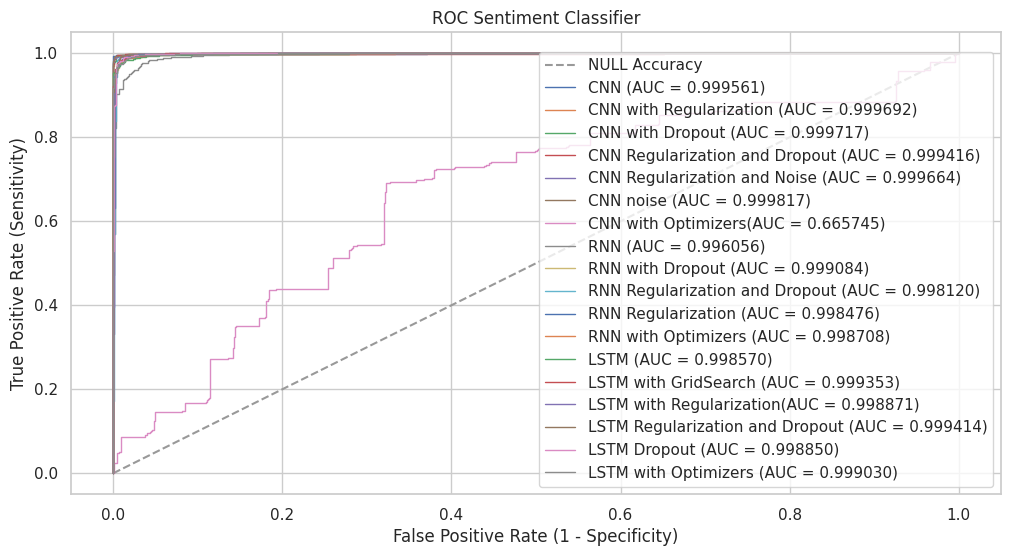

In [117]:
sns.set(style='whitegrid', context='notebook')
plt.figure(figsize=(12, 6))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='NULL Accuracy')
# plt.plot(fpr_tf, tpr_tf, lw=1, label='Logistic Regression TF (AUC = %0.6f)' % roc_auc_tf)
# plt.plot(fpr_tfidf, tpr_tfidf, lw=1, label='Logistic Regression TF-IDF (AUC = %0.6f)' % roc_auc_tfidf)
# plt.plot(fpr_vader, tpr_vader, lw=1, label='VADER SentimentIntensityAnalyzer (AUC = %0.6f)' % roc_auc_vader)
# plt.plot(fpr_lemmatizer, tpr_lemmatizer, lw=1, label='VADER with Lemmatizer (AUC = %0.6f)' % roc_auc_lemmatizer)
# plt.plot(fpr_lem_div, tpr_lem_div, lw=1, label='VADER with Lemmatizer div senteces (AUC = %0.6f)' % roc_auc_lem_div)
# plt.plot(fpr_lem2, tpr_lem2, lw=1, label='VADER Lemmatize text with POS (AUC = %0.6f)' % roc_auc_lem2)
# plt.plot(fpr_tfidf_knn, tpr_tfidf_knn, lw=1, label='KNN TF-IDF (AUC = %0.6f)' % roc_auc_tfidf_knn)
# plt.plot(fpr_tfidf_dt, tpr_tfidf_dt, lw=1, label='Decision Tree TF-IDF (AUC = %0.6f)' % roc_auc_tfidf_dt)
plt.plot(fpr_cnn, tpr_cnn, lw=1, label='CNN (AUC = %0.6f)' % roc_auc_cnn)
plt.plot(fpr_cnn_reg, tpr_cnn_reg, lw=1, label='CNN with Regularization (AUC = %0.6f)' % roc_auc_cnn_reg)
plt.plot(fpr_cnn_cnn_dropout, tpr_cnn_dropout, lw=1, label='CNN with Dropout (AUC = %0.6f)' % roc_auc_cnn_dropout)
plt.plot(fpr_cnn_cnn_reg_dropout, tpr_cnn_reg_dropout, lw=1, label='CNN Regularization and Dropout (AUC = %0.6f)' % roc_auc_cnn_reg_dropout)
plt.plot(fpr_cnn_reg_noise, tpr_cnn_reg_noise, lw=1, label='CNN Regularization and Noise (AUC = %0.6f)' % roc_auc_cnn_reg_noise)
plt.plot(fpr_cnn_noise, tpr_cnn_noise, lw=1, label='CNN noise (AUC = %0.6f)' % roc_auc_cnn_noise)
plt.plot(fpr_cnn_noise_dropout_optimizer, tpr_cnn_noise_dropout_optimizer, lw=1, label='CNN with Optimizers(AUC = %0.6f)' % roc_auc_cnn_noise_dropout_optimizer)
plt.plot(fpr_rnn, tpr_rnn, lw=1, label='RNN (AUC = %0.6f)' % roc_auc_rnn)
plt.plot(fpr_rnn_dropout, tpr_rnn_dropout, lw=1, label='RNN with Dropout (AUC = %0.6f)' % roc_auc_rnn_dropout)
plt.plot(fpr_rnn_reg_dropout, tpr_rnn_reg_dropout, lw=1, label='RNN Regularization and Dropout (AUC = %0.6f)' % roc_auc_rnn_reg_dropout)
plt.plot(fpr_rnn_reg, tpr_rnn_reg, lw=1, label='RNN Regularization (AUC = %0.6f)' % roc_auc_rnn_reg)
plt.plot(fpr_rnn_noise_dropout_optimizer, tpr_rnn_noise_dropout_optimizer, lw=1, label='RNN with Optimizers (AUC = %0.6f)' % roc_auc_rnn_noise_dropout_optimizer)
plt.plot(fpr_lstm, tpr_lstm, lw=1, label='LSTM (AUC = %0.6f)' % roc_auc_lstm)
plt.plot(fpr_lstm_gs, tpr_lstm_gs, lw=1, label='LSTM with GridSearch (AUC = %0.6f)' % roc_auc_lstm_gs)
plt.plot(fpr_lstm_reg, tpr_lstm_reg, lw=1, label='LSTM with Regularization(AUC = %0.6f)' % roc_auc_lstm_reg)
plt.plot(fpr_lstm_reg_dropout, tpr_lstm_reg_dropout, lw=1, label='LSTM Regularization and Dropout (AUC = %0.6f)' % roc_auc_lstm_reg_dropout)
plt.plot(fpr_lstm_dropout, tpr_lstm_dropout, lw=1, label='LSTM Dropout (AUC = %0.6f)' % roc_auc_lstm_dropout)
plt.plot(fpr_lstm_noise_dropout_optimizer, tpr_lstm_noise_dropout_optimizer, lw=1, label='LSTM with Optimizers (AUC = %0.6f)' % roc_auc_lstm_noise_dropout_optimizer)
plt.title('ROC Sentiment Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

# **GRU - Gated Recurrent Unit**

In [118]:
#GRU
model_gru = Sequential()
model_gru.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
model_gru.add(GRU(units=50))
model_gru.add(Dense(1, activation='sigmoid'))

model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
model_gru.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
149/149 [==============================] - 16s 89ms/step - loss: 0.2669 - auc: 0.9683 - val_loss: 0.0964 - val_auc: 0.9897
Epoch 2/5
149/149 [==============================] - 13s 84ms/step - loss: 0.0316 - auc: 0.9992 - val_loss: 0.0504 - val_auc: 0.9983
Epoch 3/5
149/149 [==============================] - 9s 60ms/step - loss: 0.0074 - auc: 1.0000 - val_loss: 0.0526 - val_auc: 0.9969
Epoch 4/5
149/149 [==============================] - 10s 67ms/step - loss: 0.0063 - auc: 0.9995 - val_loss: 0.0497 - val_auc: 0.9984
Epoch 5/5
149/149 [==============================] - 10s 68ms/step - loss: 0.0034 - auc: 0.9998 - val_loss: 0.0457 - val_auc: 0.9981


In [119]:
y_pred_prob_gru = model_gru.predict(X_test).flatten()
y_pred_gru = (y_pred_prob_gru > 0.5).astype(int)

fpr_gru, tpr_gru, thresholds = metrics.roc_curve(y_test, y_pred_prob_gru)
roc_auc_gru = metrics.auc(fpr_gru, tpr_gru)
add_model_metrics('GRU', y_test, y_pred_gru, y_pred_prob_gru, "selection")

print(f"ROC AUC: {roc_auc_gru}")

74/74 [==============================] - 1s 12ms/step
ROC AUC: 0.99848545891341


In [120]:
add_model_metrics('GRU', y_test, y_pred_gru,
                  y_pred_prob_gru, "selection")

In [121]:
# Save the entire model as a SavedModel.
model_gru.save('models/GRU')

In [122]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a GRU layer
    model.add(keras.layers.GRU(
        units=hp.Int('gru_units', min_value=32, max_value=256, step=32),
        return_sequences=False  # Set to True if stacking GRU layers, else False
    ))

    # Adding a Dense layer for output
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='gru_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model_gru_gs = tuner.get_best_models(num_models=1)[0]
results_gru_gs = best_model_gru_gs.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results_gru_gs)

Trial 3 Complete [00h 01m 25s]
val_loss: 0.13908591866493225

Best val_loss So Far: 0.028645476326346397
Total elapsed time: 00h 03m 40s
74/74 [==============================] - 2s 12ms/step - loss: 0.0286 - auc: 0.9983
Test Loss, Test AUC: [0.028645476326346397, 0.998278796672821]


In [123]:
y_pred_prob_gru_gs = best_model_gru_gs.predict(X_test).flatten()  # Get the probabilities
y_pred_gru_gs = (y_pred_prob_gru_gs > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc_gru_gs = metrics.roc_auc_score(y_test, y_pred_prob_gru_gs)
fpr_gru_gs, tpr_gru_gs, thresholds = metrics.roc_curve(y_test, y_pred_prob_gru_gs)
print("ROC AUC Score:", roc_auc_gru_gs)

74/74 [==============================] - 1s 12ms/step
ROC AUC Score: 0.9996814241162689


In [124]:
add_model_metrics('GRU_gs', y_test, y_pred_gru_gs, y_pred_prob_gru_gs, "selection")

In [125]:
# Save the entire model as a SavedModel.
best_model_gru_gs.save('models/GRU_gs')

In [126]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a GRU layer with L1 and L2 regularization
    model.add(keras.layers.GRU(
        units=hp.Int('gru_units', min_value=32, max_value=256, step=32),
        return_sequences=False,  # Set to True if stacking GRU layers, else False
        kernel_regularizer=keras.regularizers.l1_l2(
            l1=hp.Float('l1_reg_gru', min_value=1e-5, max_value=1e-2, sampling='log'),
            l2=hp.Float('l2_reg_gru', min_value=1e-5, max_value=1e-2, sampling='log')
        )
    ))

    # Adding a Dense layer for output with L1 and L2 regularization
    model.add(keras.layers.Dense(
        units=1,
        activation='sigmoid',
        kernel_regularizer=keras.regularizers.l1_l2(
            l1=hp.Float('l1_reg_dense', min_value=1e-5, max_value=1e-2, sampling='log'),
            l2=hp.Float('l2_reg_dense', min_value=1e-5, max_value=1e-2, sampling='log')
        )))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='gru_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model_gru_reg = tuner.get_best_models(num_models=1)[0]
results_gru_reg = best_model_gru_reg.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results_gru_reg)

Trial 3 Complete [00h 01m 26s]
val_loss: 0.153211310505867

Best val_loss So Far: 0.04283119738101959
Total elapsed time: 00h 04m 18s
74/74 [==============================] - 2s 17ms/step - loss: 0.0428 - auc: 0.9982
Test Loss, Test AUC: [0.04283119738101959, 0.998171329498291]


In [127]:
y_pred_prob_gru_reg = best_model_gru_reg.predict(X_test).flatten()  # Get the probabilities
y_pred_gru_reg = (y_pred_prob_gru_reg > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc_gru_reg = metrics.roc_auc_score(y_test, y_pred_prob_gru_reg)
fpr_gru_reg, tpr_gru_reg, thresholds = metrics.roc_curve(y_test, y_pred_prob_gru_reg)
print("ROC AUC Score:", roc_auc_gru_reg)

74/74 [==============================] - 1s 12ms/step
ROC AUC Score: 0.998736887655371


In [128]:
add_model_metrics('GRU_reg', y_test, y_pred_gru_reg, y_pred_prob_gru_reg, "selection")

In [129]:
# Save the entire model as a SavedModel.
best_model_gru_reg.save('models/GRU_reg')

In [130]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a GRU layer with dropout and recurrent dropout
    model.add(keras.layers.GRU(
        units=hp.Int('gru_units', min_value=32, max_value=256, step=32),
        return_sequences=False,  # Set to True if stacking GRU layers, else False
        dropout=hp.Float('dropout_rate', min_value=0, max_value=0.5, step=0.1),
        recurrent_dropout=hp.Float('recurrent_dropout_rate', min_value=0, max_value=0.5, step=0.1)
    ))

    # Adding a Dense layer for output
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Optional: Adding dropout after the Dense layer
    model.add(keras.layers.Dropout(hp.Float('dense_dropout_rate', min_value=0, max_value=0.5, step=0.1)))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='gru_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model_gru_dropout = tuner.get_best_models(num_models=1)[0]
results_gru_dropout = best_model_gru_dropout.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results_gru_dropout)

Trial 3 Complete [00h 01m 25s]
val_loss: 0.1348399817943573

Best val_loss So Far: 0.025765443220734596
Total elapsed time: 00h 03m 40s
74/74 [==============================] - 2s 12ms/step - loss: 0.0258 - auc: 0.9989
Test Loss, Test AUC: [0.025765443220734596, 0.9988909363746643]


In [131]:
y_pred_prob_gru_dropout = best_model_gru_dropout.predict(X_test).flatten()  # Get the probabilities
y_pred_gru_dropout = (y_pred_prob_gru_dropout > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc_gru_dropout = metrics.roc_auc_score(y_test, y_pred_prob_gru_dropout)
fpr_gru_dropout, tpr_gru_dropout, thresholds = metrics.roc_curve(y_test, y_pred_prob_gru_dropout)
print("ROC AUC Score:", roc_auc_gru_dropout)

74/74 [==============================] - 1s 12ms/step
ROC AUC Score: 0.999519524896668


In [132]:
add_model_metrics('GRU_dropout', y_test, y_pred_gru_dropout, y_pred_prob_gru_dropout, "selection")

In [133]:
# Save the entire model as a SavedModel.
best_model_gru_dropout.save('models/GRU_dropout')

In [134]:
def build_model(hp, vocab_size, max_length):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))

    # Adding a GRU layer with dropout, recurrent dropout and L1, L2 regularization
    model.add(keras.layers.GRU(
        units=hp.Int('gru_units', min_value=32, max_value=256, step=32),
        return_sequences=False,  # Set to True if stacking GRU layers, else False
        dropout=hp.Float('dropout_rate', min_value=0, max_value=0.5, step=0.1),
        recurrent_dropout=hp.Float('recurrent_dropout_rate', min_value=0, max_value=0.5, step=0.1),
        kernel_regularizer=keras.regularizers.l1_l2(
            l1=hp.Float('l1_reg', min_value=1e-5, max_value=1e-2, sampling='log'),
            l2=hp.Float('l2_reg', min_value=1e-5, max_value=1e-2, sampling='log')
        )
    ))

    # Adding a Dense layer for output with L1 and L2 regularization
    model.add(keras.layers.Dense(
        units=1,
        activation='sigmoid',
        kernel_regularizer=keras.regularizers.l1_l2(
            l1=hp.Float('l1_reg', min_value=1e-5, max_value=1e-2, sampling='log'),
            l2=hp.Float('l2_reg', min_value=1e-5, max_value=1e-2, sampling='log')
        )))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['AUC'])
    return model

# Assume vocab_size and max_length are defined based on your dataset
vocab_size = 10000  # example value
max_length = 100    # example value

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model(hp, vocab_size, max_length),
    objective="val_loss",  # Updated objective to AUC, common in binary classification
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='gru_search'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model_gru_reg_dropout = tuner.get_best_models(num_models=1)[0]
results_gru_reg_dropout = best_model_gru_reg_dropout.evaluate(X_test, y_test)
print("Test Loss, Test AUC:", results_gru_reg_dropout)

Trial 3 Complete [00h 01m 25s]
val_loss: 0.15313991904258728

Best val_loss So Far: 0.02930033951997757
Total elapsed time: 00h 03m 03s
74/74 [==============================] - 2s 18ms/step - loss: 0.0293 - auc: 0.9984
Test Loss, Test AUC: [0.02930033951997757, 0.9984086155891418]


In [135]:
y_pred_prob_gru_reg_dropout = best_model_gru_reg_dropout.predict(X_test).flatten()  # Get the probabilities
y_pred_gru_reg_dropout = (y_pred_prob_gru_reg_dropout > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc_gru_reg_dropout = metrics.roc_auc_score(y_test, y_pred_prob_gru_reg_dropout)
fpr_gru_reg_dropout, tpr_gru_reg_dropout, thresholds = metrics.roc_curve(y_test, y_pred_prob_gru_reg_dropout)
print("ROC AUC Score:", roc_auc_gru_reg_dropout)

74/74 [==============================] - 2s 17ms/step
ROC AUC Score: 0.9997060447349181


In [136]:
add_model_metrics('GRU_reg_dropout', y_test, y_pred_gru_reg_dropout,
                  y_pred_prob_gru_reg_dropout, "selection")

In [137]:
# Save the entire model as a SavedModel.
best_model_gru_reg_dropout.save('models/GRU_reg_dropout')

In [138]:
def build_model_gru_noise_dropout_optimizer(hp, vocab_size, max_length):
    model = keras.Sequential(name="model_gru_noise_dropout_optimizer")
    model.add(keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length, name="embedding_gru_noise_dropout_optimizer"))

    # Adding a GRU layer with dynamic unit selection
    model.add(keras.layers.GRU(
        units=hp.Int('gru_units_gru_noise_dropout_optimizer', min_value=32, max_value=256, step=32),
        return_sequences=False,  # Set to True if stacking more GRU layers, else False
        name="gru_gru_noise_dropout_optimizer"
    ))

    # Conditional regularization choice
    reg_type = hp.Choice('reg_type_gru_noise_dropout_optimizer', ['gaussian_noise', 'dropout'])
    if reg_type == 'gaussian_noise':
        model.add(keras.layers.GaussianNoise(
            hp.Float('noise_level_gru_noise_dropout_optimizer', min_value=0.0, max_value=0.5, step=0.1),
            name="gaussian_noise_gru_noise_dropout_optimizer"
        ))
    else:
        model.add(keras.layers.Dropout(
            hp.Float('dropout_rate_gru_noise_dropout_optimizer', min_value=0.0, max_value=0.5, step=0.1),
            name="dropout_gru_noise_dropout_optimizer"
        ))

    # Adding a Dense layer for output
    model.add(keras.layers.Dense(1, activation='sigmoid', name="output_gru_noise_dropout_optimizer"))

    # Choosing the optimizer and learning rate from a set of options
    optimizer_choice = hp.Choice('optimizer_gru_noise_dropout_optimizer', ['adam', 'sgd', 'rmsprop', 'adagrad'])
    learning_rate = hp.Float('learning_rate_gru_noise_dropout_optimizer', min_value=1e-4, max_value=1e-2, sampling='log')
    if optimizer_choice == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate, name="sgd_gru_noise_dropout_optimizer")
    else:
        # Properly instantiate the optimizer with the specified learning rate
        optimizer = keras.optimizers.get({
            'class_name': optimizer_choice,
            'config': {'learning_rate': learning_rate}
        })

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['AUC']
    )
    return model

vocab_size = 10000  # Example value for vocab size
max_length = 100    # Example value for sequence max length

tuner = kt.GridSearch(
    hypermodel=lambda hp: build_model_gru_noise_dropout_optimizer(hp, vocab_size, max_length),
    objective="val_loss",
    max_trials=3,
    overwrite=True,
    executions_per_trial=1,
    directory='my_dir',
    project_name='gru_search_with_reg_optimizer'
)

# Ensure X_train, y_train, X_test, y_test are defined and preprocessed appropriately
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

best_model_gru_noise_dropout_optimizer = tuner.get_best_models(num_models=1)[0]
results_gru_noise_dropout_optimizer = best_model_gru_noise_dropout_optimizer.evaluate(X_test, y_test)
print("Test Loss, Test AUC_gru_noise_dropout_optimizer:", results_gru_noise_dropout_optimizer)

Trial 3 Complete [00h 00m 47s]
val_loss: 0.05161821469664574

Best val_loss So Far: 0.04100592061877251
Total elapsed time: 00h 03m 37s
74/74 [==============================] - 2s 13ms/step - loss: 0.0410 - auc: 0.9986
Test Loss, Test AUC_gru_noise_dropout_optimizer: [0.04100592061877251, 0.9986133575439453]


In [139]:
y_pred_prob_gru_noise_dropout_optimizer = best_model_gru_noise_dropout_optimizer.predict(X_test).flatten()  # Get the probabilities
y_pred_gru_noise_dropout_optimizer = (y_pred_prob_gru_noise_dropout_optimizer > 0.5).astype(int)  # Convert probabilities to binary class labels

roc_auc_gru_noise_dropout_optimizer = metrics.roc_auc_score(y_test, y_pred_prob_gru_noise_dropout_optimizer)
fpr_gru_noise_dropout_optimizer, tpr_gru_noise_dropout_optimizer, thresholds = metrics.roc_curve(y_test, y_pred_prob_gru_noise_dropout_optimizer)
print("ROC AUC Score_gru_noise_dropout_optimizer:", roc_auc_gru_noise_dropout_optimizer)

74/74 [==============================] - 1s 12ms/step
ROC AUC Score_gru_noise_dropout_optimizer: 0.9986585493233061


In [140]:
add_model_metrics('GRU_noise_dropout_optimizert', y_test,
                  y_pred_gru_noise_dropout_optimizer, y_pred_prob_gru_noise_dropout_optimizer,
                  "selection")

In [141]:
# Save the entire model as a SavedModel.
best_model_gru_noise_dropout_optimizer.save('models/GRU_noise_dropout_optimizert')

In [142]:
#Choose the best GRU model
select_best_model()

Model name:  GRU -> SCORE:  0.6610123777146318
Model name:  GRU_gs -> SCORE:  0.6632805820355704
Model name:  GRU_reg -> SCORE:  0.6618814247269363
Model name:  GRU_dropout -> SCORE:  0.6637312196860587
Model name:  GRU_reg_dropout -> SCORE:  0.6637689228390097
Model name:  GRU_noise_dropout_optimizert -> SCORE:  0.6605496070317894
Selected best model: GRU_reg_dropout
Best model metrics:
auc: 0.9997060447349181
precision: 0.9947447447447447
recall: 0.9925093632958801
f1_score: 0.993625796775403
roc_auc: 0.9927686258710476
pr_auc: 0.999781290302197
log_loss: 0.024860845594055374


In [ ]:
# Obliczanie wartości dla krzywej PR
precision, recall, thresholds = metrics.precision_recall_curve(y_pred_gru, y_pred_prob_gru)

# Rysowanie krzywej PR
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

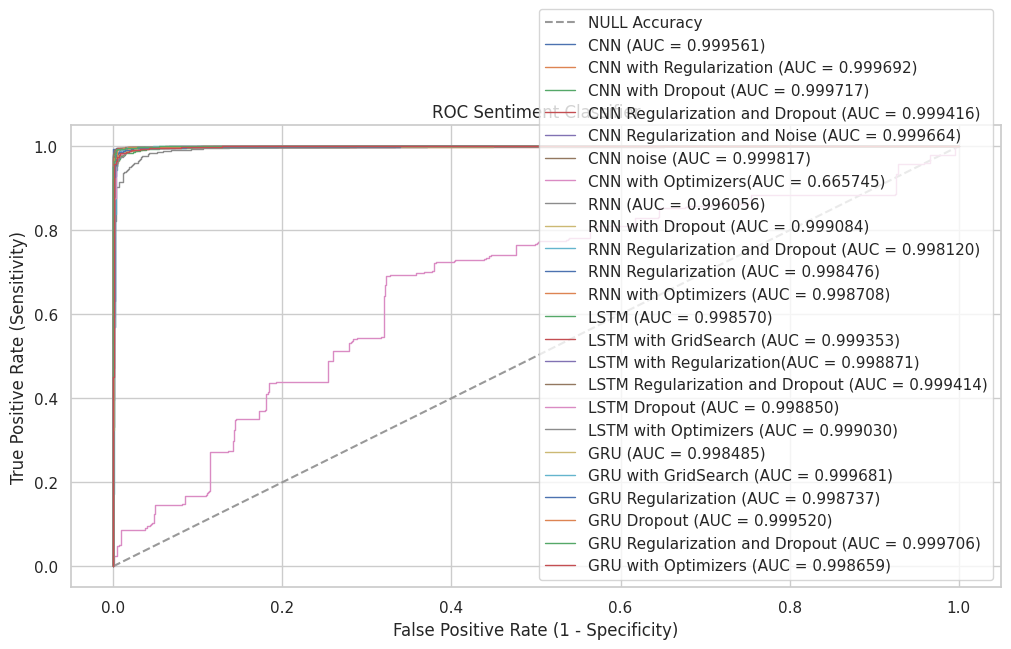

In [143]:
sns.set(style='whitegrid', context='notebook')
plt.figure(figsize=(12, 6))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='NULL Accuracy')
# plt.plot(fpr_tf, tpr_tf, lw=1, label='Logistic Regression TF (AUC = %0.6f)' % roc_auc_tf)
# plt.plot(fpr_tfidf, tpr_tfidf, lw=1, label='Logistic Regression TF-IDF (AUC = %0.6f)' % roc_auc_tfidf)
# plt.plot(fpr_vader, tpr_vader, lw=1, label='VADER SentimentIntensityAnalyzer (AUC = %0.6f)' % roc_auc_vader)
# plt.plot(fpr_lemmatizer, tpr_lemmatizer, lw=1, label='VADER with Lemmatizer (AUC = %0.6f)' % roc_auc_lemmatizer)
# plt.plot(fpr_lem_div, tpr_lem_div, lw=1, label='VADER with Lemmatizer div senteces (AUC = %0.6f)' % roc_auc_lem_div)
# plt.plot(fpr_lem2, tpr_lem2, lw=1, label='VADER Lemmatize text with POS (AUC = %0.6f)' % roc_auc_lem2)
# plt.plot(fpr_tfidf_knn, tpr_tfidf_knn, lw=1, label='KNN TF-IDF (AUC = %0.6f)' % roc_auc_tfidf_knn)
# plt.plot(fpr_tfidf_dt, tpr_tfidf_dt, lw=1, label='Decision Tree TF-IDF (AUC = %0.6f)' % roc_auc_tfidf_dt)
plt.plot(fpr_cnn, tpr_cnn, lw=1, label='CNN (AUC = %0.6f)' % roc_auc_cnn)
plt.plot(fpr_cnn_reg, tpr_cnn_reg, lw=1, label='CNN with Regularization (AUC = %0.6f)' % roc_auc_cnn_reg)
plt.plot(fpr_cnn_cnn_dropout, tpr_cnn_dropout, lw=1, label='CNN with Dropout (AUC = %0.6f)' % roc_auc_cnn_dropout)
plt.plot(fpr_cnn_cnn_reg_dropout, tpr_cnn_reg_dropout, lw=1, label='CNN Regularization and Dropout (AUC = %0.6f)' % roc_auc_cnn_reg_dropout)
plt.plot(fpr_cnn_reg_noise, tpr_cnn_reg_noise, lw=1, label='CNN Regularization and Noise (AUC = %0.6f)' % roc_auc_cnn_reg_noise)
plt.plot(fpr_cnn_noise, tpr_cnn_noise, lw=1, label='CNN noise (AUC = %0.6f)' % roc_auc_cnn_noise)
plt.plot(fpr_cnn_noise_dropout_optimizer, tpr_cnn_noise_dropout_optimizer, lw=1, label='CNN with Optimizers(AUC = %0.6f)' % roc_auc_cnn_noise_dropout_optimizer)
plt.plot(fpr_rnn, tpr_rnn, lw=1, label='RNN (AUC = %0.6f)' % roc_auc_rnn)
plt.plot(fpr_rnn_dropout, tpr_rnn_dropout, lw=1, label='RNN with Dropout (AUC = %0.6f)' % roc_auc_rnn_dropout)
plt.plot(fpr_rnn_reg_dropout, tpr_rnn_reg_dropout, lw=1, label='RNN Regularization and Dropout (AUC = %0.6f)' % roc_auc_rnn_reg_dropout)
plt.plot(fpr_rnn_reg, tpr_rnn_reg, lw=1, label='RNN Regularization (AUC = %0.6f)' % roc_auc_rnn_reg)
plt.plot(fpr_rnn_noise_dropout_optimizer, tpr_rnn_noise_dropout_optimizer, lw=1, label='RNN with Optimizers (AUC = %0.6f)' % roc_auc_rnn_noise_dropout_optimizer)
plt.plot(fpr_lstm, tpr_lstm, lw=1, label='LSTM (AUC = %0.6f)' % roc_auc_lstm)
plt.plot(fpr_lstm_gs, tpr_lstm_gs, lw=1, label='LSTM with GridSearch (AUC = %0.6f)' % roc_auc_lstm_gs)
plt.plot(fpr_lstm_reg, tpr_lstm_reg, lw=1, label='LSTM with Regularization(AUC = %0.6f)' % roc_auc_lstm_reg)
plt.plot(fpr_lstm_reg_dropout, tpr_lstm_reg_dropout, lw=1, label='LSTM Regularization and Dropout (AUC = %0.6f)' % roc_auc_lstm_reg_dropout)
plt.plot(fpr_lstm_dropout, tpr_lstm_dropout, lw=1, label='LSTM Dropout (AUC = %0.6f)' % roc_auc_lstm_dropout)
plt.plot(fpr_lstm_noise_dropout_optimizer, tpr_lstm_noise_dropout_optimizer, lw=1, label='LSTM with Optimizers (AUC = %0.6f)' % roc_auc_lstm_noise_dropout_optimizer)
plt.plot(fpr_gru, tpr_gru, lw=1, label='GRU (AUC = %0.6f)' % roc_auc_gru)
plt.plot(fpr_gru_gs, tpr_gru_gs, lw=1, label='GRU with GridSearch (AUC = %0.6f)' % roc_auc_gru_gs)
plt.plot(fpr_gru_reg, tpr_gru_reg, lw=1, label='GRU Regularization (AUC = %0.6f)' % roc_auc_gru_reg)
plt.plot(fpr_gru_dropout, tpr_gru_dropout, lw=1, label='GRU Dropout (AUC = %0.6f)' % roc_auc_gru_dropout)
plt.plot(fpr_gru_reg_dropout, tpr_gru_reg_dropout, lw=1, label='GRU Regularization and Dropout (AUC = %0.6f)' % roc_auc_gru_reg_dropout)
plt.plot(fpr_gru_noise_dropout_optimizer, tpr_gru_noise_dropout_optimizer, lw=1, label='GRU with Optimizers (AUC = %0.6f)' % roc_auc_gru_noise_dropout_optimizer)
plt.title('ROC Sentiment Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)

In [ ]:
# def get_palette(metric_values, base_color="blue"):
#     # Normalize the metric values to range between 0 and 1
#     normalized = (metric_values - metric_values.min()) / (metric_values.max() - metric_values.min())
#     # Create a palette that darkens with higher values
#     palette = sns.dark_palette(base_color, n_colors=len(metric_values))
#     # Sort the palette by metric values, reversed for darker colors at higher values
#     return [palette[i] for i in normalized.argsort()[::-1]]


In [144]:
df_model_metrics = pd.DataFrame(model_metrics).T
df_model_metrics

y_pred  \
CNN_reg          [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, ...   
RNN_reg_dropout  [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, ...   
LSTM_reg         [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, ...   
GRU_reg_dropout  [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, ...   

                                                           y_probs       auc  \
CNN_reg          [0.9995802, 0.0006938369, 0.99996316, 0.000586...  0.999692   
RNN_reg_dropout  [0.9999766, 9.253473e-05, 0.9999832, 0.0001643...   0.99812   
LSTM_reg         [0.9999373, 0.00011470991, 0.9996948, 0.000111...  0.998871   
GRU_reg_dropout  [0.9999485, 5.999757e-05, 0.99997723, 2.717794...  0.999706   

                precision    recall  f1_score   roc_auc    pr_auc  log_loss  
CNN_reg          0.995509  0.996255  0.995882  0.995139  0.999797  0.016357  
RNN_reg_dropout  0.991038  0.994007  0.992521  0.991028  0.997802  0.046992  
LSTM_reg         0.990291  0.993258  0.991773  0.990155  0.998918  0.036772  
GRU_reg_dropout  0.994745  0.992509  0.993626  0.992769  0.999781  0.024861

In [145]:
#model_metrics

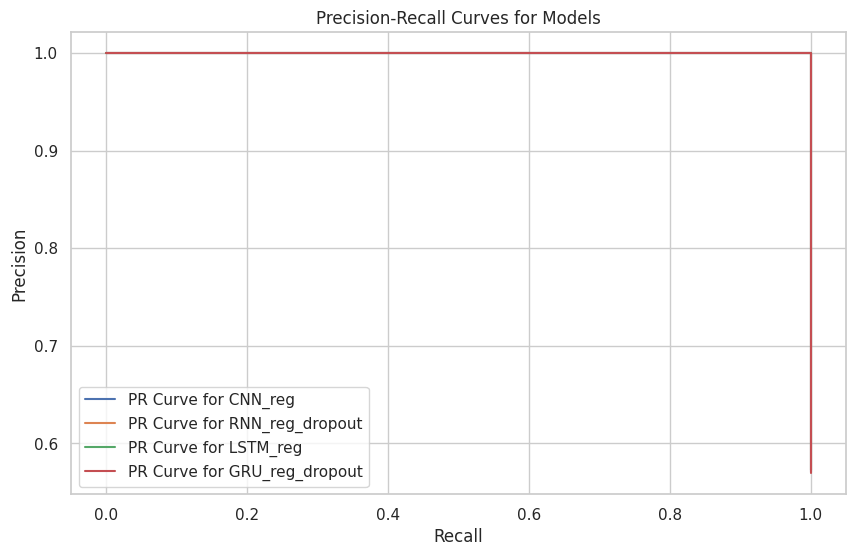

In [146]:

# Assuming 'y_true' contains the actual labels corresponding to the predictions and probabilities
# y_true = np.array([...])  # You need to provide this

# Accessing model probabilities and plotting PR curves
fig, ax = plt.subplots(figsize=(10, 6))

for model_name, model_data in model_metrics.items():
  if 'y_probs' in model_data and 'y_pred' in model_data:
    # Extract probabilities and true labels
    y_scores = np.array(model_data['y_probs'])
    y_true = np.array(model_data['y_pred'])  # Only if y_pred corresponds to true labels

    # Compute precision-recall values
    precision, recall, _ = metrics.precision_recall_curve(y_true, y_scores)

    # Plot the precision-recall curve for the model
    ax.plot(recall, precision, label=f'PR Curve for {model_name}')
  else:
    print(f"Error: Missing 'y_probs' or 'y_pred' for {model_name}")

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curves for Models')
ax.legend(loc="best")
plt.show()


In [150]:
def plot_performance_metrics(df_model_metrics):
    # Suppress future warnings locally
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)

        # Set the aesthetic style of the plots
        sns.set(style="whitegrid")

        # Define a list of metrics to be plotted
        metrics_to_plot = ['auc', 'precision', 'recall', 'f1_score', 'roc_auc', 'pr_auc']

        # Filter the DataFrame to include only the specified metrics
        filtered_metrics = df_model_metrics[metrics_to_plot]

        # Check the number of models (columns) after filtering
        num_models = len(df_model_metrics)

        # Single plot for one model with multiple metrics or multiple plots if multiple models
        if num_models == 1:
          # Single model case
          fig, ax = plt.subplots(figsize=(8, 4))
          sns.barplot(data=filtered_metrics, ax=ax, palette='viridis')
          ax.set_title('Performance Metrics for the Model')
          ax.set_ylabel('Value')
          ax.set_xlabel('Metric')
          ax.tick_params(axis='x', rotation=45)
          # Annotate the bars
          # for p in ax.patches:
          #   ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 10), textcoords='offset points')
          for p in ax.patches:
                value = p.get_height()
                x = p.get_x() + p.get_width() / 2
                # Adjusting y to ensure the annotation always fits within the plot area
                if value >= ax.get_ylim()[1] * 0.9:  # If value is within the top 5% of the y-axis
                    y = ax.get_ylim()[1] * 0.85  # Lower the annotation to 95% of the y-axis height
                else:
                    y = value + 0.01 * ax.get_ylim()[1]  # Else, slightly above the bar
                ax.annotate(f"{value:.2f}", (x, y), ha='center', va='bottom', fontsize=10, color='#06172a', xytext=(0, 3), textcoords='offset points')
        else:
          # Multiple models case
          fig, axes = plt.subplots(figsize=(20, 6))
          melted_df = filtered_metrics.reset_index().melt(id_vars='index')
          sns.barplot(x='variable', y='value', hue='index', data=melted_df, ax=axes, palette='viridis')
          axes.set_title('Performance Metrics Comparison Across Models')
          axes.set_ylabel('Value')
          axes.set_xlabel('Metric')
          axes.tick_params(axis='x', rotation=45)
          axes.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

          for p in axes.patches:
                value = p.get_height()
                x = p.get_x() + p.get_width() / 2
                # Adjusting y to ensure the annotation always fits within the plot area
                if value >= axes.get_ylim()[1] * 0.9:  # If value is within the top 5% of the y-axis
                    y = axes.get_ylim()[1] * 0.85  # Lower the annotation to 95% of the y-axis height
                else:
                    y = value + 0.01 * axes.get_ylim()[1]  # Else, slightly above the bar
                axes.annotate(f"{value:.2f}", (x, y), ha='center', va='bottom', fontsize=10, color='#06172a', xytext=(0, 3), textcoords='offset points')



        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


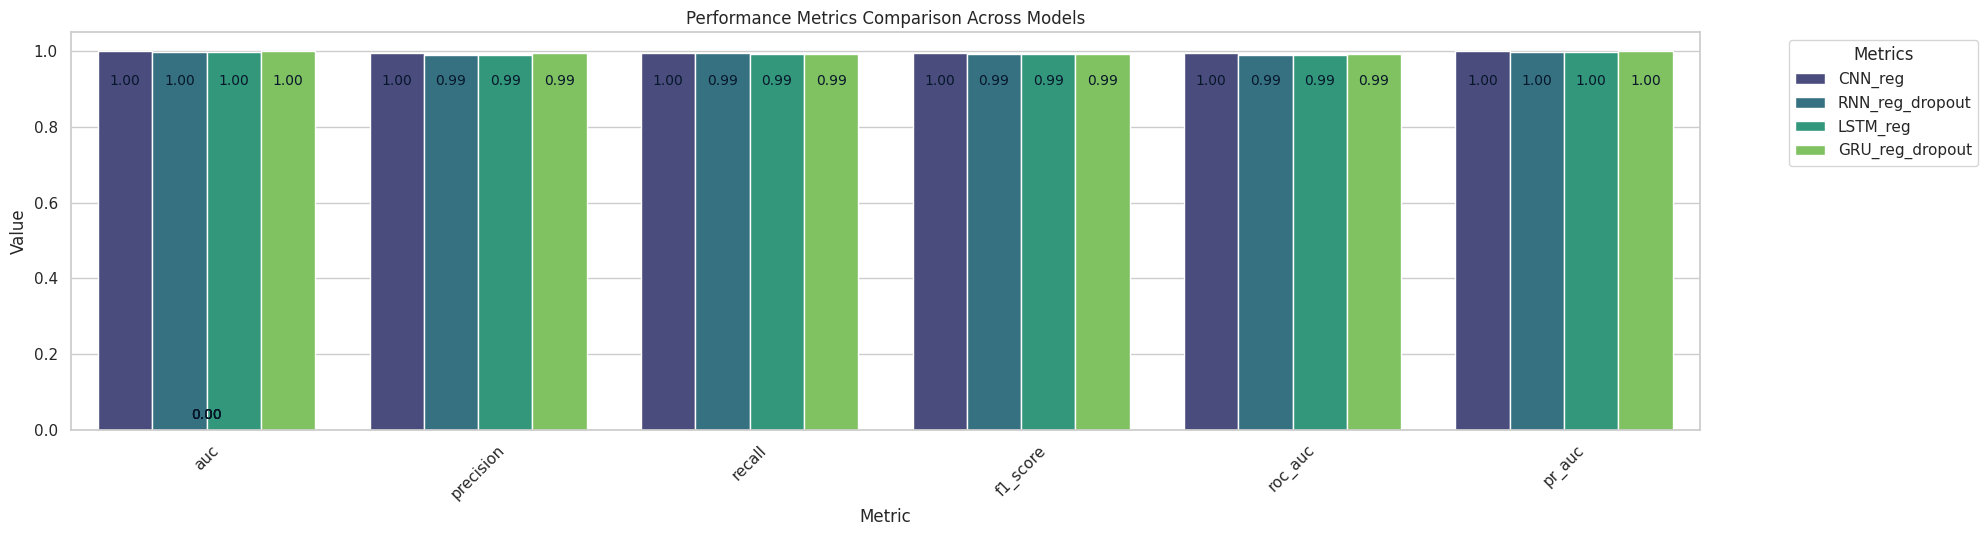

In [151]:
#df_model_metrics = df_model_metrics.T
plot_performance_metrics(df_model_metrics)

In [152]:
def select_top_best_models(metrics_dict=None, drop=True, top_n=3):
    # Use a global dictionary if none is provided
    if metrics_dict is None:
        global model_metrics_temp
        metrics_dict = model_metrics_temp

    # Add calculated scores to each model's metrics
    for model_name, model_measures in metrics_dict.items():
        weights = {'Precision': 0.2, 'Recall': 0.2, 'F1 Score': 0.3, 'Auc': 0.2}
        normalized_measures = {key.capitalize(): value for key, value in model_measures.items() if key.capitalize() in weights}
        model_measures['Score'] = calculate_aggregated_metric_from_dict(normalized_measures, weights)

    # Sort and select the top models based on the newly added 'Score'
    best_models = sorted(metrics_dict.items(), key=lambda x: x[1]['Score'], reverse=True)[:top_n]
    top_models_dict = {model_name: measures for model_name, measures in best_models}

    # Display metrics for the top models
    if top_models_dict:
        for model_name, measures in top_models_dict.items():
            print(f"Selected top model: {model_name}")
            print("Model metrics:")
            print(*(f"{k}: {v}" for k, v in measures.items() if k != 'Score'), sep="\n")
            print("Score:", measures['Score'])
    else:
        print("No valid models were found.")

    # Optionally clear the original metrics dictionary
    if drop:
        metrics_dict.clear()

    # Return the dictionary containing only the best models
    return top_models_dict

def calculate_weighted_score(metrics, weights):
    total_weight = sum(weights.values())
    aggregated_score = sum(metrics[metric] * weights[metric] for metric in metrics if metric in weights)

    if total_weight == 0:
        raise ValueError("The sum of the weights cannot be equal to zero.")

    return aggregated_score / total_weight

def calculate_aggregated_metric_from_dict(data, weights):
    normalized_data = {key.capitalize(): value for key, value in data.items() if key.capitalize() in weights}
    return calculate_weighted_score(normalized_data, weights)


Selected top model: CNN_reg
Model metrics:
y_pred: [1 0 1 ... 1 1 0]
y_probs: [9.9958020e-01 6.9383689e-04 9.9996316e-01 ... 9.9955642e-01 9.9919713e-01
 5.1435316e-04]
auc: 0.9996918692272111
precision: 0.9955089820359282
recall: 0.9962546816479401
f1_score: 0.9958816922500936
roc_auc: 0.9951392930152051
pr_auc: 0.9997968668596486
log_loss: 0.01635713307236769
Score: 0.6647678962024621


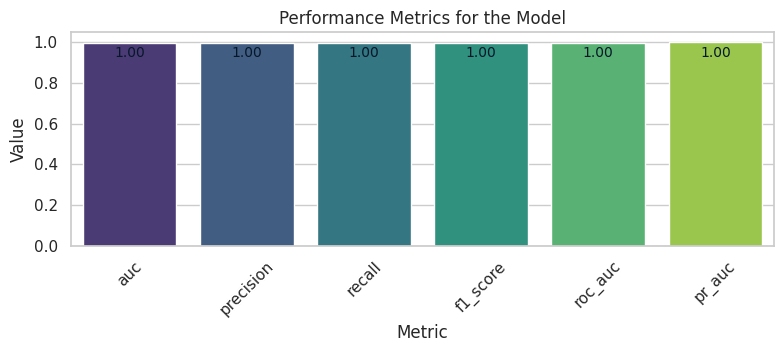

In [153]:
top_model_dict = select_top_best_models(metrics_dict=model_metrics, drop=False, top_n=1)
plot_performance_metrics(pd.DataFrame.from_dict(top_model_dict, orient='index'))

In [163]:
df_top_models = pd.DataFrame(top_model_dict).T
df_top_models.reset_index(inplace=True)
df_top_models.rename(columns={'index': 'Model'}, inplace=True)

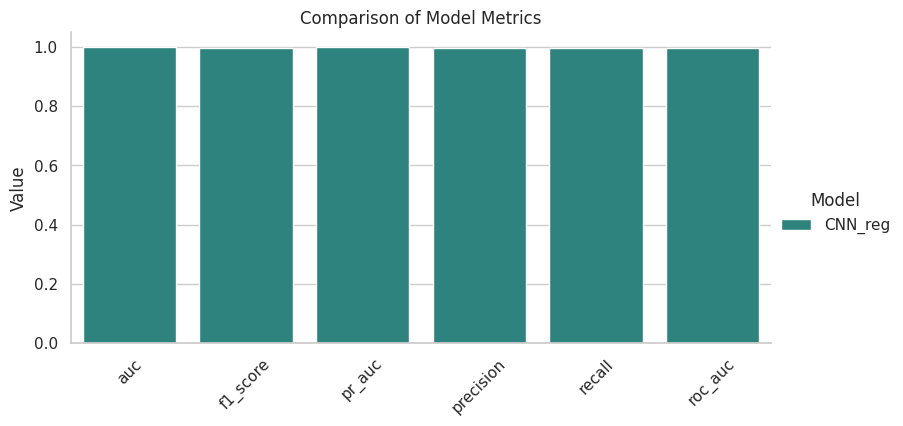

In [176]:
columns_to_exclude = ['y_pred', 'y_probs', 'log_loss', 'Score']

columns_to_visualize = [col for col in df_top_models.columns if col not in columns_to_exclude]

df_plot = df_top_models.melt(id_vars=['Model'], value_vars=columns_to_visualize, var_name='Metric', value_name='Value')

g = sns.catplot(x='Metric', y='Value', hue='Model', data=df_plot, kind='bar', palette='viridis', height=4, aspect=2)
g.set_xticklabels(rotation=45)
g.set_axis_labels("", "Value")
g._legend.set_title('Model')
plt.title('Comparison of Model Metrics')
plt.show()

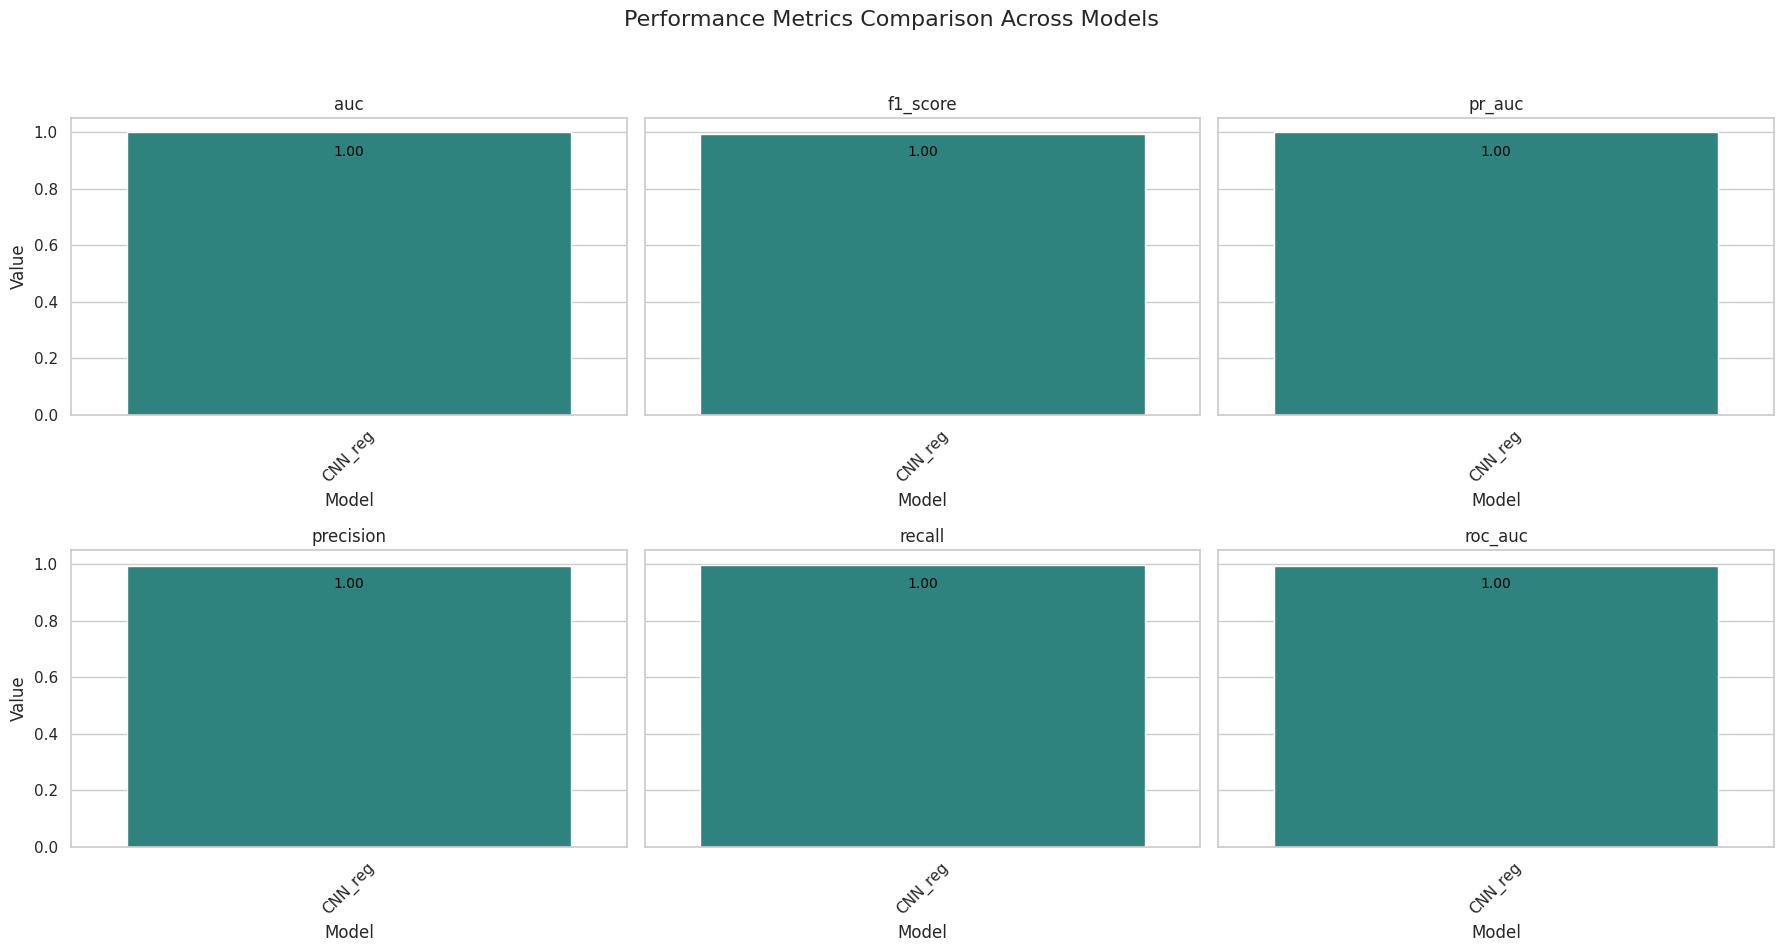

In [170]:
# Suppress future warnings locally
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Set the aesthetic style of the plots
    sns.set(style="whitegrid")

    # Transpose the DataFrame for easier plotting of metrics (skipping specific columns)
    df_plot = df_top_models.set_index('Model').drop(columns=['y_pred', 'y_probs', 'Score', 'log_loss']).transpose()

    # Define the layout of the subplots
    num_metrics = len(df_plot)
    num_columns = 3
    num_rows = (num_metrics + num_columns - 1) // num_columns  # Round up the division

    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, num_rows * 5), sharey=True)
    fig.suptitle('Performance Metrics Comparison Across Models', fontsize=16)

    # Flatten axes array and hide unused axes
    axes = axes.flatten()
    for ax in axes[num_metrics:]:
        ax.set_visible(False)

    # Loop through each metric and create a bar plot
    for ax, (metric, values) in zip(axes, df_plot.iterrows()):
        sns.barplot(ax=ax, x=values.index, y=values.values, palette='viridis', width=0.8)
        ax.set_title(metric)
        ax.set_ylabel('Value')
        ax.set_xlabel('Model')
        ax.tick_params(axis='x', rotation=45)

        # Adjusting the annotation placement
        for p in ax.patches:
            value = p.get_height()
            x = p.get_x() + p.get_width() / 2
            # Adjusting y to ensure the annotation always fits within the plot area
            if value >= ax.get_ylim()[1] * 0.9:  # If value is within the top 10% of the y-axis
                y = ax.get_ylim()[1] * 0.85  # Lower the annotation to 85% of the y-axis height
            else:
                y = value + 0.01 * ax.get_ylim()[1]  # Else, slightly above the bar
            ax.annotate(f"{value:.2f}", (x, y), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')

    # Adjust layout to prevent label overlap
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Show the plot
    plt.show()


In [165]:
best_final_model = None

def load_model_global(model_path):
    global best_final_model
    if os.path.isdir(model_path):
        # Assuming it's a Keras SavedModel directory
        try:
            best_final_model = load_model(model_path)
            print(f"Model loaded from {model_path}.")
        except Exception as e:
            print(f"Failed to load Keras model from {model_path}: {e}")
    else:
        # Assuming it's a pickle file
        try:
            with open(model_path, 'rb') as file:
                best_final_model = pickle.load(file)
            print(f"Model loaded from {model_path}.")
        except Exception as e:
            print(f"Failed to load pickle model from {model_path}: {e}")

def predict_with_best_final_model(model, data, tokenizer=None, max_length=None):
    if hasattr(model, 'predict'):
        # This branch is for Keras models
        if tokenizer is not None and max_length is not None:
            # Assume it's a Keras model expecting tokenized input
            sequences = tokenizer.texts_to_sequences(data['comment'])
            X_test_new = pad_sequences(sequences, maxlen=max_length)
            y_pred_prob = model.predict(X_test_new).flatten()
            y_pred = (y_pred_prob > 0.5).astype(int)
            return y_pred, y_pred_prob
        else:
            print("Tokenizer and max_length must be provided for Keras models.")
            return None, None
    elif hasattr(model, 'predict_proba'):
        # This branch is for sklearn models
        y_pred = model.predict(data)
        y_pred_prob = model.predict_proba(data)[:, 1]
        return y_pred, y_pred_prob
    else:
        print("Model type not supported for predictions.")
        return None, None


# Load the final model
final_model_path = 'models/cnn'  # Adjust this path to your model's location
load_model_global(final_model_path)

# Predict with the Keras model
comments = test_data_df  # DataFrame containing the comments
y_pred, y_pred_prob = predict_with_best_final_model(best_final_model, comments, tokenizer, max_length)


Model loaded from models/cnn.
1033/1033 [==============================] - 3s 3ms/step


In [167]:
# Create a DataFrame with comments and their predicted classes
predictions_df = pd.DataFrame({
    'comment': test_data_df['comment'],
    'predicted_class': y_pred
})

# Filter comments into two separate groups
negative_comments = predictions_df[predictions_df['predicted_class'] == 0]['comment']
positive_comments = predictions_df[predictions_df['predicted_class'] == 1]['comment']


Word Cloud for Negative Comments (Class 0):


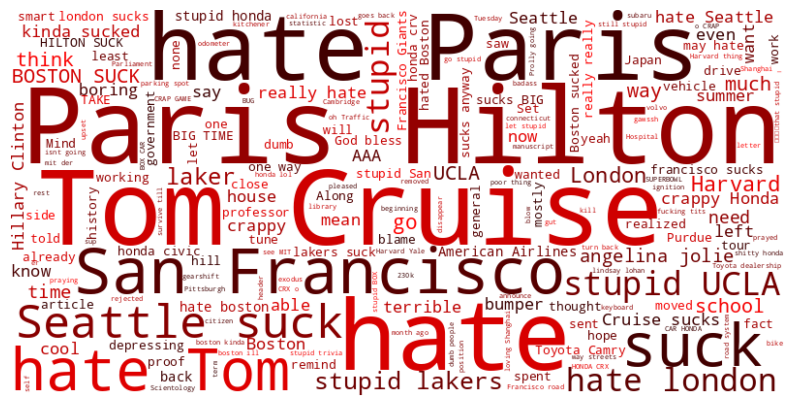

Word Cloud for Positive Comments (Class 1):


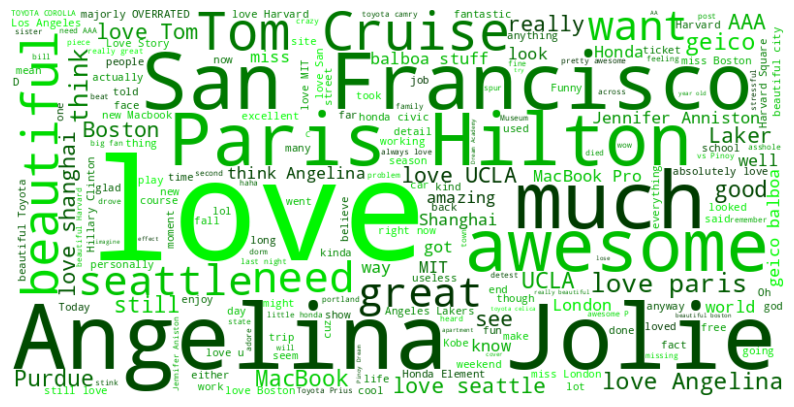

In [168]:
from wordcloud import WordCloud, get_single_color_func
import matplotlib.pyplot as plt

class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the position in the list."""
    def __init__(self, color_to_words, default_color):
        self.color_to_words = color_to_words
        self.default_color = default_color

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        return get_single_color_func(self.color_to_words.get(word, self.default_color))

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

# Function to generate and display a word cloud with custom colors
def generate_wordcloud(text, color_to_words, default_color):
    wordcloud = WordCloud(width = 800, height = 400, background_color ='white',
                          color_func=SimpleGroupedColorFunc(color_to_words, default_color)).generate(" ".join(text))
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Define colors for each word cloud
negative_color_to_words = {}
positive_color_to_words = {}

# Example: Assigning red shades for negative and green shades for positive
negative_default_color = 'darkred'  # Default color for words not in negative_color_to_words
positive_default_color = 'darkgreen'  # Default color for words not in positive_color_to_words

# Generate and display word cloud for negative comments
print("Word Cloud for Negative Comments (Class 0):")
generate_wordcloud(negative_comments, negative_color_to_words, negative_default_color)

# Generate and display word cloud for positive comments
print("Word Cloud for Positive Comments (Class 1):")
generate_wordcloud(positive_comments, positive_color_to_words, positive_default_color)


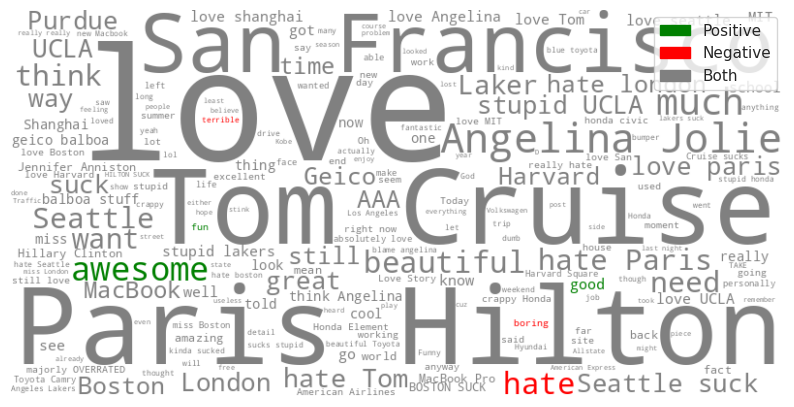

In [169]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Custom color function to apply colors based on word sentiment
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    positive_words = ['awesome', 'good', 'nice', 'super', 'fun', 'delightful', 'happy']  # Example positive words
    negative_words = ['hate', 'bad', 'awful', 'terrible', 'boring', 'sad', 'worse']  # Example negative words
    if word in positive_words:
        return 'green'
    elif word in negative_words:
        return 'red'
    else:
        return 'grey'  # Neutral color for words not specified

# Generate a combined word cloud
combined_comments = pd.concat([negative_comments, positive_comments])
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      color_func=color_func, prefer_horizontal=1.0).generate(" ".join(combined_comments))

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Create a legend for the colors
legend_handles = [mpatches.Patch(color='green', label='Positive'),
                  mpatches.Patch(color='red', label='Negative'),
                  mpatches.Patch(color='grey', label='Both')]
plt.legend(handles=legend_handles, loc='upper right')

plt.show()